### Introduction

In today's world, engagement on a website can often lead to a fragmented viewing experience that takes users to different webpages and tabs. This fragmentation creates challenges for data collection as users are moving away from the site. Pagedip works to solve for this by containing all engagement within the page through unique widgets such as sliders, tab-its, overlays, and so on. These widgets allow for a wide variety of content to be displayed on a single webpage in a simplistic and digestable manner. 

To take it one step further, Pagedip collects data on user engagement across its pagedips and widgets. This data has the potential to drive insights that would allow for companies to optimize their web experience by better understanding how users are interacting with the site and which content is performing best or underperforming. For example, if the company has spent the majority of its time on a specific pagedip, but has found that users are engaging with this pagedip the least, then it would be in the company's best interest to either shift focus away from that pagedip or rethink the pagedip design and how that information is presented. 

For this project, we will cluster pagedips using a K-Means model to help drive takeaways around pagedip performance. We will also adjust for Tab-it and Slider idiosyncracies to increase the accuracy of that data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
from matplotlib import rcParams
import matplotlib.pyplot as plt
from pylab import rcParams
import datetime
from sklearn.preprocessing import LabelEncoder
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.ticker import StrMethodFormatter
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

import os
os.chdir('C:/Users/linds/OneDrive/Documents/MSDS/MSDS 696 - Practicum II')

### Data Import
Pagedip provided two datasets for one of their clients: Views and Media Interactions. The Views data includes records for anyone that viewed the pagedips, and Media Interactions include all of the events that took place by users on those pagedips.

In [2]:
views = pd.read_csv('views.csv')
views.head()

,Pagedip ID,Pagedip title,Pagedip Handle,Location,Time Stamp,Country,State,City,Client session ID,Device type
0,5a816a00-db9a-11ec-aba5-b919df6bf647,NaN,authentication,https://salesforce.pagedip.com/authentication/,2022-05-29T10:36:35.261Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop
1,5a816a00-db9a-11ec-aba5-b919df6bf647,NaN,authentication,https://salesforce.pagedip.com/authentication/...,2022-05-29T10:38:15.887Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop
2,5a816a00-db9a-11ec-aba5-b919df6bf647,NaN,authentication,https://salesforce.pagedip.com/authentication/,2022-05-29T10:39:50.299Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop
3,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,NaN,digitize-the-contact-center,https://salesforce.pagedip.com/digitize-the-co...,2022-05-29T10:39:58.669Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop
4,5a816a00-db9a-11ec-aba5-b919df6bf647,NaN,authentication,https://salesforce.pagedip.com/authentication/,2022-05-29T12:04:09.202Z,United States,Georgia,NaN,3cbafab1-4299-4e67-9463-5163ffbbdc7b,mobile phone


In [3]:
mi = pd.read_csv('interactions.csv')
mi.head()

,Pagedip ID,Pagedip title,Pagedip Handle,Location,Time Stamp,Country,State,City,Client session ID,Device type,...,Button URL,Table of contents event,Table of contents item URL,Back/Next Direction,Back/Next to Page,Image src,Video time,Link Label,Link URL,External
0,5a816a00-db9a-11ec-aba5-b919df6bf647,NaN,authentication,https://salesforce.pagedip.com/authentication/,2022-05-29T10:38:00.102Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Login with Salesforce SSO,NaN,True
1,5a816a00-db9a-11ec-aba5-b919df6bf647,NaN,authentication,https://salesforce.pagedip.com/authentication/,2022-05-29T10:38:00.108Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Login with Salesforce SSO,NaN,True
2,5a816a00-db9a-11ec-aba5-b919df6bf647,NaN,authentication,https://salesforce.pagedip.com/authentication/,2022-05-29T10:38:00.119Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop,...,https://pagedip.com/signin/9cf396d0-59f2-11ec-...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5a816a00-db9a-11ec-aba5-b919df6bf647,NaN,authentication,https://salesforce.pagedip.com/authentication/,2022-05-29T10:39:49.221Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,view the play,NaN,False
4,5a816a00-db9a-11ec-aba5-b919df6bf647,NaN,authentication,https://salesforce.pagedip.com/authentication/,2022-05-29T10:39:49.381Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,view the play,NaN,False


##### Remove authentication
For the purpose of our model, we will remove the authentication page as this is only where users log in and it is not meaningful for our analysis.

In [4]:
views = views[views['Pagedip Handle'] != 'authentication']
views.head()

,Pagedip ID,Pagedip title,Pagedip Handle,Location,Time Stamp,Country,State,City,Client session ID,Device type
3,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,NaN,digitize-the-contact-center,https://salesforce.pagedip.com/digitize-the-co...,2022-05-29T10:39:58.669Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop
8,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,NaN,build-faster-and-automate,https://salesforce.pagedip.com/build-faster-an...,2022-05-30T02:07:59.495Z,United States,Georgia,Alpharetta,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,desktop
9,e67f6e70-dbb4-11ec-bac7-8531db541d56,NaN,efficient-field-service-operations,https://salesforce.pagedip.com/efficient-field...,2022-05-30T10:55:23.881Z,United States,NaN,NaN,4281f5a9-5859-4cda-a54e-094926158046,desktop
13,e6459470-8088-11ec-b53d-252a12b41b79,NaN,automate-business-processes-with-digital-hq-fo...,https://salesforce.pagedip.com/automate-busine...,2022-05-30T13:16:02.297Z,United States,NaN,NaN,83a52296-121b-4f5e-ba51-57768b9a2c6a,desktop
19,5b8ce410-89ec-11ec-bb94-6d0f7bef74f7,NaN,efficiently-sell-direct-to-consumer-for-medica...,https://salesforce.pagedip.com/efficiently-sel...,2022-05-30T13:39:40.132Z,India,Maharashtra,Mumbai,55c2c77d-e1a4-444a-bcdc-562a77b66f2d,desktop


In [5]:
mi = mi[mi['Pagedip Handle'] != 'authentication']
mi.head()

,Pagedip ID,Pagedip title,Pagedip Handle,Location,Time Stamp,Country,State,City,Client session ID,Device type,...,Button URL,Table of contents event,Table of contents item URL,Back/Next Direction,Back/Next to Page,Image src,Video time,Link Label,Link URL,External
5,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,NaN,digitize-the-contact-center,https://salesforce.pagedip.com/digitize-the-co...,2022-05-29T10:40:04.305Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,NaN,build-faster-and-automate,https://salesforce.pagedip.com/build-faster-an...,2022-05-30T02:08:09.644Z,United States,Georgia,Alpharetta,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,NaN,build-faster-and-automate,https://salesforce.pagedip.com/build-faster-an...,2022-05-30T02:08:10.294Z,United States,Georgia,Alpharetta,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,NaN,build-faster-and-automate,https://salesforce.pagedip.com/build-faster-an...,2022-05-30T02:08:11.055Z,United States,Georgia,Alpharetta,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,NaN,build-faster-and-automate,https://salesforce.pagedip.com/build-faster-an...,2022-05-30T02:08:13.249Z,United States,Georgia,Alpharetta,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,desktop,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Exploration
I gathered the following takeaways from the summary statistics:
- There were 39 different pagedip IDs to measure engagement on
- There were 2,209 unique client session IDs and 12,748 total which means users are visiting the pagedip handles an average of 6 times
- Not all of Pagedips' reports were standardized, as columns differ from the last Practicum project
- Many widgets were not utilized in this dataset

In [6]:
views.describe(include='all')

,Pagedip ID,Pagedip title,Pagedip Handle,Location,Time Stamp,Country,State,City,Client session ID,Device type
count,4886,0.0,4886,4965,4965,4965,2907,2961,4965,4965
unique,38,NaN,38,81,4965,29,123,274,1354,1
top,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,NaN,increase-rep-productivity-with-automation,https://salesforce.pagedip.com/increase-rep-pr...,2022-07-12T00:27:06.258Z,United States,California,Dublin,dd16a93e-464c-44c9-a0fb-29358edf214e,desktop
freq,924,NaN,924,922,1,4073,958,753,74,4965
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
mi.describe(include='all')

,Pagedip ID,Pagedip title,Pagedip Handle,Location,Time Stamp,Country,State,City,Client session ID,Device type,...,Button URL,Table of contents event,Table of contents item URL,Back/Next Direction,Back/Next to Page,Image src,Video time,Link Label,Link URL,External
count,18471,0.0,18471,18471,18471,18471,12840,12995,18471,18471,...,0,308,0.0,0.0,0.0,4,9.000000,4424,0.0,5267
unique,36,NaN,36,51,18437,29,116,235,1130,2,...,0,1,NaN,NaN,NaN,3,NaN,551,NaN,2
top,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,NaN,increase-rep-productivity-with-automation,https://salesforce.pagedip.com/increase-rep-pr...,2022-06-14T00:08:26.546Z,United States,California,Dublin,dd16a93e-464c-44c9-a0fb-29358edf214e,desktop,...,NaN,toggle,NaN,NaN,NaN,https://salesforce.pagedip.com/connect-any-sys...,NaN,View in Google Slides,NaN,True
freq,3387,NaN,3387,3387,2,15165,5744,5239,2499,18469,...,NaN,308,NaN,NaN,NaN,2,NaN,306,NaN,5119
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,34.411834,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.919289,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.003000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.022161,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.871627,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,74.989762,NaN,NaN,NaN


##### Top Events
The top events in this dataset are Links, Expandable Lists, Overlays, Vidyards, Binks, and Tab-its. I incorporated these in our model with the following exceptions:
- I excluded Links as this is the only pagedip widget that takes a user away from the page and therefore data is lost after that point
- I included Sliders in the transformation portion of this analysis to demonstrate the adjustment for the widget idiosyncracy. However, I will not include this in our model as it was not used frequently enough and I do not want to model noise

In [8]:
n = mi.shape[0]
variables = []
missingvals = []
missingvalsp = []

for col in mi:
    variables.append(col)
    missingvals.append(mi[col].isna().sum())
    missingvalsp.append((mi[col].isna().sum())/n)

missingvalsdata = {'Variable': variables, 'Missing Values': missingvals, 'Missing Values %': missingvalsp}
missingvalsdf = pd.DataFrame(data=missingvalsdata)

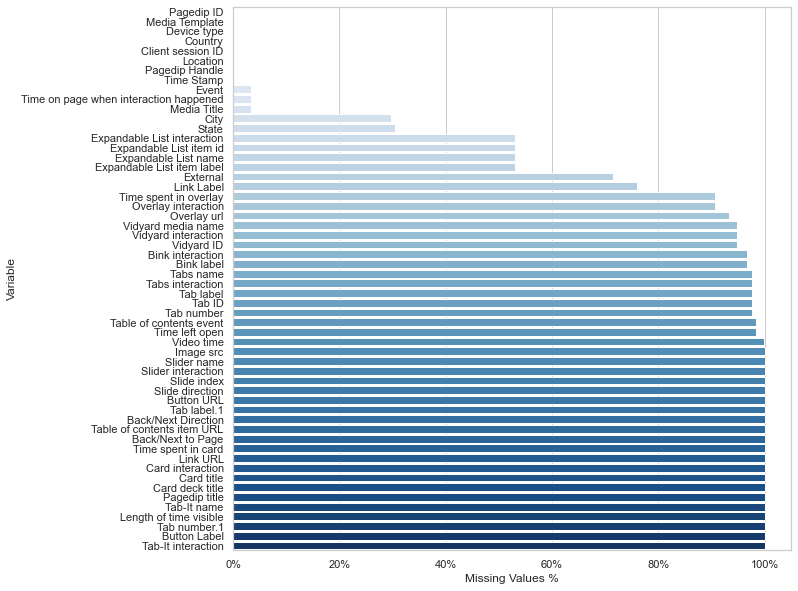

In [9]:
fig = plt.figure(figsize=(10,10))
ax = sns.barplot(x="Missing Values %", y="Variable", data=missingvalsdf, palette="Blues", order=missingvalsdf.sort_values('Missing Values %').Variable)
ax.set_xticklabels(['0%','20%','40%','60%','80%','100%'])
fig.patch.set(facecolor = "white")
ax;

#### Time
I found milliseconds difficult to comprehend, so I converted any time columns into seconds

In [10]:
mi['Time on page when interaction happened'] = mi['Time on page when interaction happened'] / 1000
mi['Length of time visible'] = mi['Length of time visible'] / 1000
mi['Time spent in overlay'] = mi['Time spent in overlay'] / 1000
mi['Time spent in card'] = mi['Time spent in card'] / 1000
mi['Time left open'] = mi['Time left open'] / 1000

##### Removing outliers

There are several outliers on time variables. These are likely due to people not closing the widget or leaving their computer while the widget is open. 

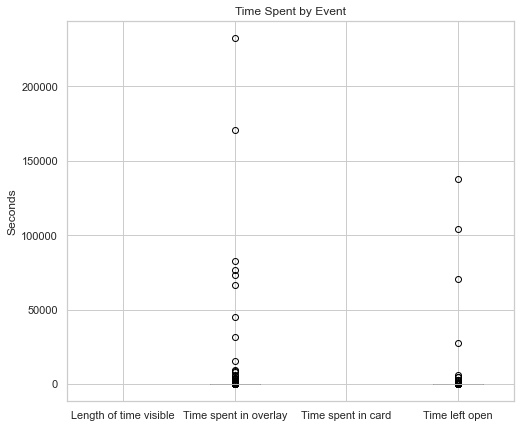

In [11]:
rcParams['figure.figsize'] = 15,15

t = mi.loc[:,mi.columns.str.contains('time', case=False) & ~mi.columns.str.contains('stamp|happened|video', case=False)]

plt.rcParams['figure.figsize'] = (8, 7)
t.boxplot()
plt.title('Time Spent by Event')
plt.ylabel('Seconds');

To not inaccurately inflate engagement time, I adjusted the time variables to drop any values outside of the interquartile range. 

#### Overlays
##### Before

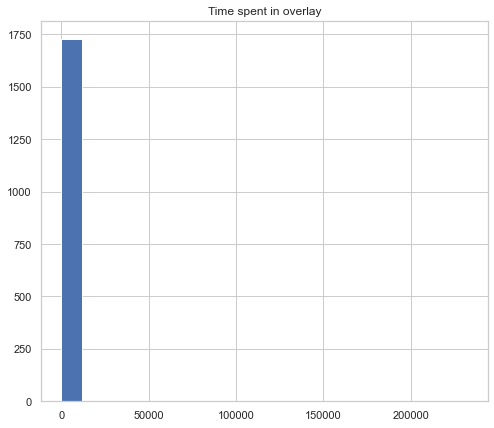

In [12]:
mi.hist(column=t.columns[1], bins=20);

#### Overlays
##### After

In [13]:
Q1 = mi[t.columns[1]].quantile(0.25)
Q3 = mi[t.columns[1]].quantile(0.75)
IQR = Q3-Q1
mi[t.columns[1]]=mi[t.columns[1]][~((mi[t.columns[1]]<(Q1-1.5*IQR)) | (mi[t.columns[1]]>(Q3+1.5*IQR)))]

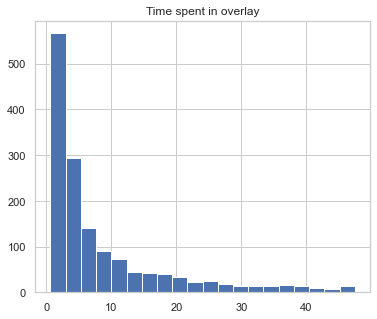

In [14]:
plt.rcParams['figure.figsize'] = (6, 5)
mi.hist(column=t.columns[1], bins=20);

#### Binks
##### Before

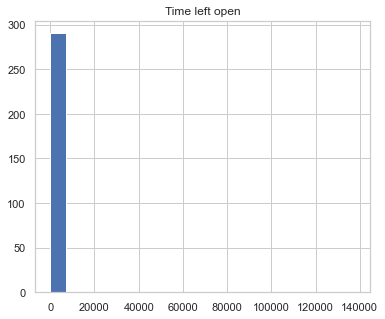

In [15]:
plt.rcParams['figure.figsize'] = (6, 5)
mi.hist(column=t.columns[3], bins=20);

In [16]:
Q1 = mi[t.columns[3]].quantile(0.25)
Q3 = mi[t.columns[3]].quantile(0.75)
IQR = Q3-Q1
mi[t.columns[3]]=mi[t.columns[3]][~((mi[t.columns[3]]<(Q1-1.5*IQR)) | (mi[t.columns[3]]>(Q3+1.5*IQR)))]

#### Binks
##### After

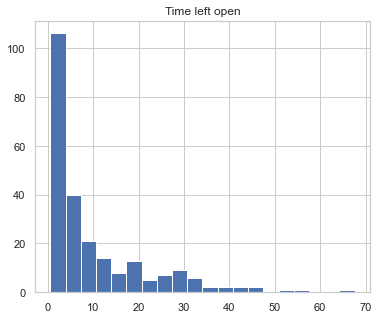

In [17]:
plt.rcParams['figure.figsize'] = (6, 5)
mi.hist(column=t.columns[3], bins=20);

### Pagedip Statistics

I plotted which days and times were most popular for engagement on Pagedips. I also converted time to minutes to more easily digest the takeaways.
<br>
<br>
##### Day of Week
First I started with total and average time spent per day of week. At the time of this analysis, the most sessions occurred on Tuesdays and Thursdays respectively. However, Tuesdays had the shortest average session time. Thursdays and Mondays were when employees spent the longest time on pagedips. Weekends, naturally, were the lowest viewed days of week as most employees do not work these days.

In [18]:
mi['Date'] = pd.to_datetime(mi['Time Stamp'].str[:10])
mi['Time on page when interaction happened'] = mi['Time on page when interaction happened'].fillna(0)

dmi = mi.groupby(['Pagedip ID','Client session ID','Date'])['Time on page when interaction happened']\
        .agg(['min','max']).diff(axis=1).reset_index()
dmi = dmi.drop(['min'],axis=1)
dmi = dmi.rename(columns={"max": "Time on page"})
dmi['Time on page'] = dmi['Time on page'] / 60
dmi

,Pagedip ID,Client session ID,Date,Time on page
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,2022-07-05,0.000000
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,2022-06-28,0.770450
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,2022-06-28,7.347883
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,053f4a5a-0158-4860-903b-f1929413e9b7,2022-06-27,3.220483
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,05ecdc61-a69d-4c25-b0b0-3757879f76e6,2022-06-17,0.522467
...,...,...,...,...
1808,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,db6175a9-d318-4ee7-aca9-93c00619567e,2022-07-11,2.026817
1809,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,e7414d3e-6aeb-413e-8dc3-4415e60520b5,2022-07-07,0.174517
1810,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,2022-07-09,0.084683
1811,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,2022-06-23,0.000000


In [19]:
dmi['Day of Week'] = dmi['Date'].dt.day_name()
dmi

,Pagedip ID,Client session ID,Date,Time on page,Day of Week
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,2022-07-05,0.000000,Tuesday
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,2022-06-28,0.770450,Tuesday
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,2022-06-28,7.347883,Tuesday
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,053f4a5a-0158-4860-903b-f1929413e9b7,2022-06-27,3.220483,Monday
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,05ecdc61-a69d-4c25-b0b0-3757879f76e6,2022-06-17,0.522467,Friday
...,...,...,...,...,...
1808,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,db6175a9-d318-4ee7-aca9-93c00619567e,2022-07-11,2.026817,Monday
1809,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,e7414d3e-6aeb-413e-8dc3-4415e60520b5,2022-07-07,0.174517,Thursday
1810,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,2022-07-09,0.084683,Saturday
1811,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,2022-06-23,0.000000,Thursday


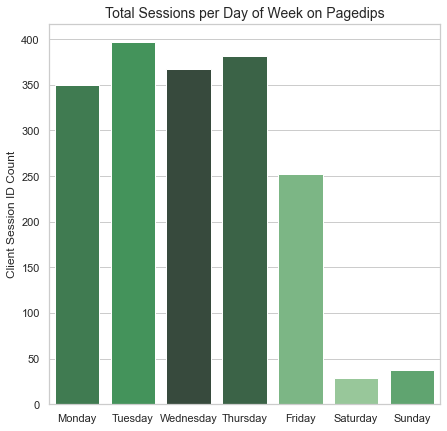

In [20]:
plt.rcParams['figure.figsize'] = (7, 7)
data = dmi.groupby("Day of Week")['Client session ID'].count()
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=data.index, y=data, data=dmi, order=['Monday','Tuesday','Wednesday',\
                                                               'Thursday','Friday','Saturday', \
                                                                'Sunday'], palette=np.array(pal[::-1])[rank])                                                              \
                                                                   
ax.set_xlabel('')
ax.set_ylabel('Client Session ID Count')
ax.set_title('Total Sessions per Day of Week on Pagedips', fontsize=14);

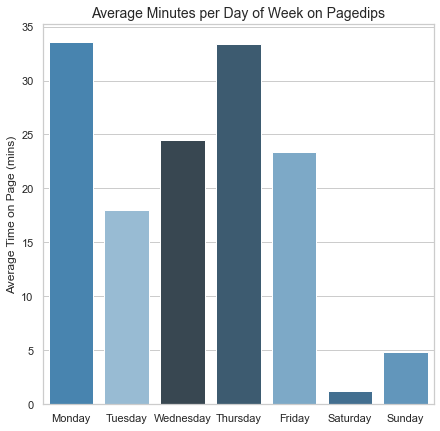

In [21]:
plt.rcParams['figure.figsize'] = (7, 7)
data = dmi.groupby("Day of Week")['Time on page'].mean()
pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=data.index, y=data, data=dmi, order=['Monday','Tuesday','Wednesday',\
                                                               'Thursday','Friday','Saturday', \
                                                                'Sunday'], palette=np.array(pal[::-1])[rank])                                                              \
                                                                   
ax.set_xlabel('')
ax.set_ylabel('Average Time on Page (mins)')
ax.set_title('Average Minutes per Day of Week on Pagedips', fontsize=14);

##### Time of Day

Next I evaluated the time of day in which employees were most active on pagedips.Employees were most active during the workday from 11a to 7p EST. Specifically sessions start off strong during the beginning of the day, slightly dip around lunch hours, and then pick back up during the afternoon.

The longest average session times are at 1a, 3a and 8a EST, however these are likely skewed by the low volume of users during that timeframe. The more logical story is that while sessions are highest during the beginning of the workday, they tend to be shorter, and longer sessions happen after lunch through close of business.

In [22]:
from datetime import datetime
mi['Time'] = pd.to_datetime(mi['Time Stamp'].str[11:16])
mi['Time']= pd.to_datetime(mi['Time'], format='%H', utc=True).dt.hour
mi['Time'] = np.where(mi['Time']==0,21,mi['Time'])
mi['Time'] = np.where(mi['Time']==1,22,mi['Time'])
mi['Time'] = np.where(mi['Time']==2,23,mi['Time']-3)

hmi = mi.groupby(['Pagedip ID','Client session ID','Time'])['Time on page when interaction happened']\
        .agg(['min','max']).diff(axis=1).reset_index()
hmi = hmi.drop(['min'],axis=1)
hmi = hmi.rename(columns={"max": "Time on page"})
hmi['Time on page'] = hmi['Time on page'] / 60
hmi

,Pagedip ID,Client session ID,Time,Time on page
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,3,0.000000
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,4,0.770450
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,5,7.347883
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,053f4a5a-0158-4860-903b-f1929413e9b7,10,3.220483
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,05ecdc61-a69d-4c25-b0b0-3757879f76e6,0,0.522467
...,...,...,...,...
2155,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,db6175a9-d318-4ee7-aca9-93c00619567e,20,2.026817
2156,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,e7414d3e-6aeb-413e-8dc3-4415e60520b5,12,0.174517
2157,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,20,0.084683
2158,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,18,0.000000


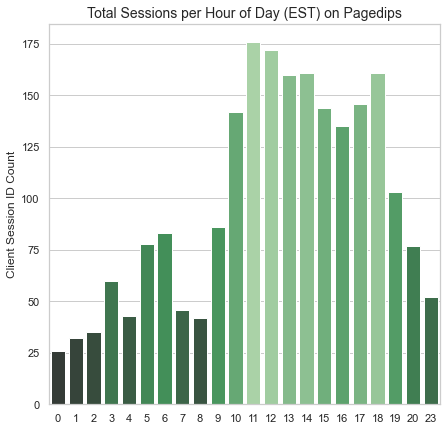

In [23]:
plt.rcParams['figure.figsize'] = (7, 7)
data = hmi.groupby("Time")['Client session ID'].count()
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=data.index, y=data, data=hmi, palette=np.array(pal[::-1])[rank])                                                              \

ax.set_xlabel('')
ax.set_ylabel('Client Session ID Count')
ax.set_title('Total Sessions per Hour of Day (EST) on Pagedips', fontsize=14);

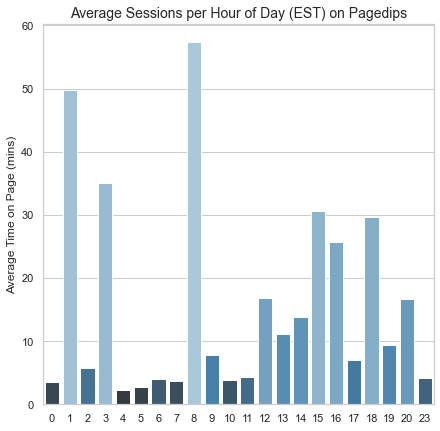

In [24]:
plt.rcParams['figure.figsize'] = (7, 7)
data = hmi.groupby("Time")['Time on page'].mean()
pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=data.index, y=data, data=hmi, palette=np.array(pal[::-1])[rank])                                                              \

ax.set_xlabel('')
ax.set_ylabel('Average Time on Page (mins)')
ax.set_title('Average Sessions per Hour of Day (EST) on Pagedips', fontsize=14);

##### Time per Pagedip

Lastly we can look at session volume and average time spent on a Pagedip ID level. There are certain Pagedips that have very little activity and a low average time spent. We should consider removing these from our model.

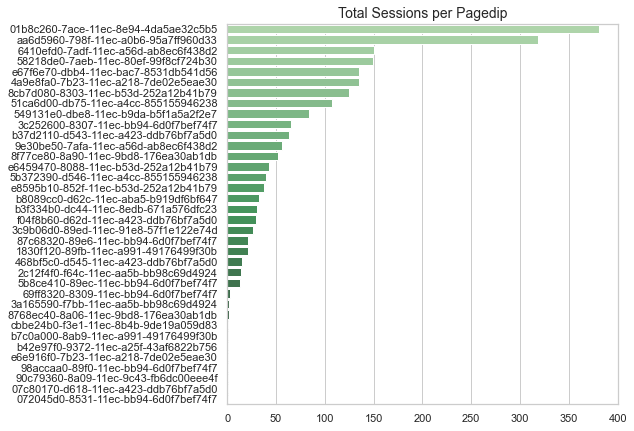

In [25]:
#total time per pagedip
plt.rcParams['figure.figsize'] = (7, 7)
data = hmi.groupby("Pagedip ID")['Client session ID'].count().sort_values(ascending=False)
pal = sns.color_palette("Greens_d", len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=data, y=data.index, data=hmi, palette=np.array(pal[::-1])[rank])                                                              \

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Total Sessions per Pagedip', fontsize=14);

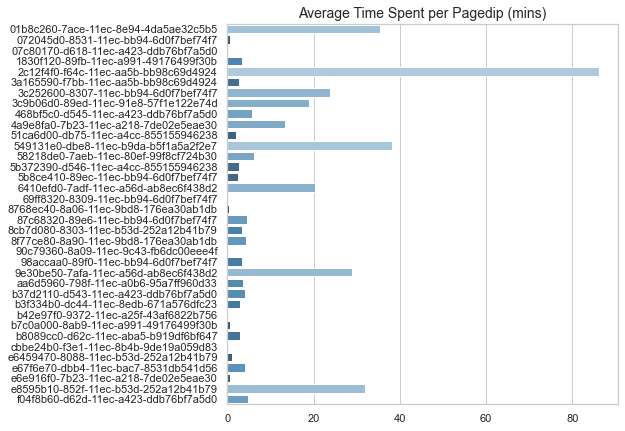

In [26]:
plt.rcParams['figure.figsize'] = (7, 7)
data = hmi.groupby("Pagedip ID")['Time on page'].mean()
pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=data, y=data.index, data=hmi, palette=np.array(pal[::-1])[rank])                                                              \

ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Average Time Spent per Pagedip (mins)', fontsize=14);

I then calculated the total time on each Pagedip to incorporate into our model.

In [27]:
#Put back in seconds
mi_tt = dmi.copy()
mi_tt['Time on page'] = mi_tt['Time on page'] * 60
mi_tt = mi_tt.groupby(['Pagedip ID'])['Time on page'].sum().reset_index()
mi_tt

,Pagedip ID,Time on page
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,872972.962
1,072045d0-8531-11ec-bb94-6d0f7bef74f7,38.437
2,07c80170-d618-11ec-a423-ddb76bf7a5d0,0.000
3,1830f120-89fb-11ec-a991-49176499f30b,11268.985
4,2c12f4f0-f64c-11ec-aa5b-bb98c69d4924,72421.918
5,3a165590-f7bb-11ec-aa5b-bb98c69d4924,8904.820
6,3c252600-8307-11ec-bb94-6d0f7bef74f7,31687.604
7,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,37077.371
8,468bf5c0-d545-11ec-a423-ddb76bf7a5d0,4832.899
9,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,141732.761


### Open/Close Time on Widgets

Expandable Lists have a larger discrepancy of opens to closes compared to Binks. This may be due to binks typically having more shorter content, so they are easier to close versus longer content that may go below the fold and require the inconvenience of scrolling up to close.

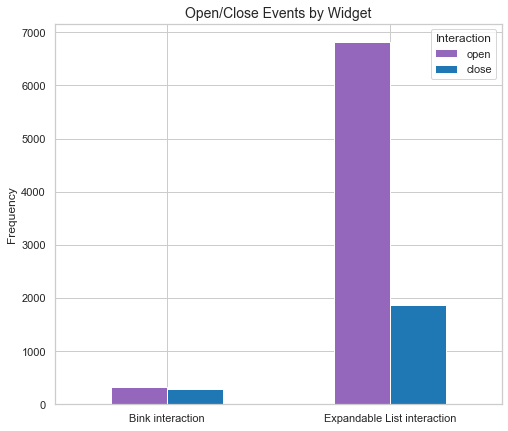

In [28]:
mioc = mi.loc[: , (mi == 'open').any()]
mioc = mioc.drop(['Event'],axis=1)

mioc1 = mioc[mioc.columns[0]].value_counts().reset_index()
mioc2 = mioc[mioc.columns[1]].value_counts().reset_index()

miocf = pd.merge(right=mioc1, left=mioc2, on='index', how='outer').fillna(0)
miocf = miocf.T.drop_duplicates().T

miocf.rename(columns = {'index':'Interaction'}, inplace = True)
miocf['Interaction'] = pd.Categorical(miocf['Interaction'], ['open','close'])
miocf.sort_values("Interaction")

plt.rcParams['figure.figsize'] = (8, 7)
c = ['tab:purple', 'tab:blue']
miocf.groupby("Interaction").sum().transpose().plot.bar(color=c)
plt.xticks(rotation='horizontal')
plt.ylabel('Frequency')
plt.title('Open/Close Events by Widget', fontsize=14)
plt.show();

To find out how long users typically leave tabs open before closing, I calculated the differences between each open and close time on to the Pagedip-Session-Widget level. 

##### Expandable Lists
For Expandable Lists, I evaluated down to the Expandable List Item Label.

By making all opens negative, I can accomplish two things: 1) Subtraction between close and open, and 2) I can remove any negative results of my summation as these were situations where there was an open, but not a close. I then dropped anything outside of the IQR range to remove any outliers.

In [29]:
el_oct = mi[['Pagedip ID', 'Client session ID', 'Expandable List name', 'Expandable List item label',\
                  'Expandable List interaction', 'Time on page when interaction happened']]
el_oct = el_oct[~el_oct['Expandable List interaction'].isnull()]

idx = el_oct[el_oct["Expandable List interaction"] == 'open'].index
el_oct.loc[idx, 'Time on page when interaction happened'] = \
                                el_oct.loc[idx, 'Time on page when interaction happened'] * (-1) 

el_oct = el_oct.groupby(['Pagedip ID','Client session ID','Expandable List name',\
                 'Expandable List item label'\
                  ], as_index=False).agg(sum)
el_oct = el_oct.loc[~((el_oct['Time on page when interaction happened'] < 0))] 
el_oct = el_oct.rename(columns={"Time on page when interaction happened": "Expandable List Time Left Open"})

Q1 = el_oct['Expandable List Time Left Open'].quantile(0.25)
Q3 = el_oct['Expandable List Time Left Open'].quantile(0.75)

IQR = Q3-Q1
droprange= el_oct[(el_oct['Expandable List Time Left Open'] < (Q1-1.5*IQR)) | (el_oct['Expandable List Time Left Open'] > (Q3+1.5*IQR)) | (el_oct['Expandable List Time Left Open'] == 0) ].index
el_oct.drop(droprange, inplace=True)
el_oct

,Pagedip ID,Client session ID,Expandable List name,Expandable List item label,Expandable List Time Left Open
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,Listen,Target Customers,3.854
27,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,08b58683-140d-4c43-a4cd-8d23d93627a3,Listen,Basho,0.631
28,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,08b58683-140d-4c43-a4cd-8d23d93627a3,Listen,Buyers and Influencers,6.141
32,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,0a53675c-8bd6-4b68-905a-f8cd186924dd,Listen,Target Customers,10.572
45,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,10b23a7d-649e-4227-978e-d9c02be98f7f,Listen,Basho,4.944
...,...,...,...,...,...
5936,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ac1386dd-6067-448c-b5c7-aa272539bd64,Listen,Industry Imperative,9.745
5937,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ac1386dd-6067-448c-b5c7-aa272539bd64,Listen,Target Customers,29.194
5938,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ac1386dd-6067-448c-b5c7-aa272539bd64,Listen,Value Slides,2.214
5941,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,b008ed28-56d1-43f1-8ce6-e1a2ce76ed93,Listen,Basho,29.151


Next I calculated the average time an expandable list was left open per Pagedip ID. I went with average as I did not want to penalize a Pagedip for having less expandable list items. 

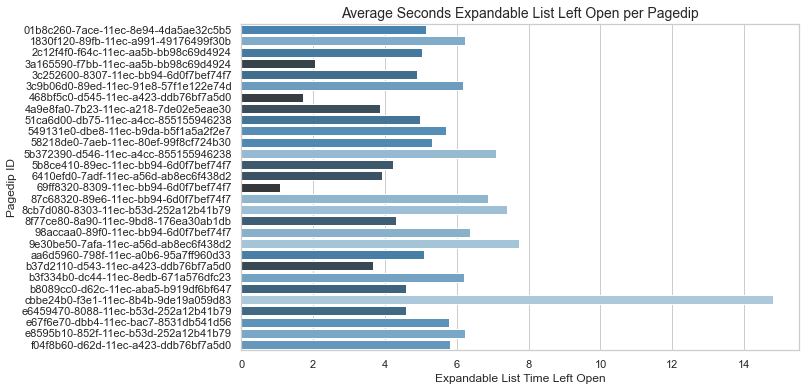

In [30]:
plt.rcParams['figure.figsize'] = (10, 6)
data = el_oct.groupby("Pagedip ID")['Expandable List Time Left Open'].mean()
pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=data, y=data.index, data=el_oct, palette=np.array(pal[::-1])[rank])                                                              \

ax.set_title('Average Seconds Expandable List Left Open per Pagedip', fontsize=14);

Lastly I took a look at the differences on a pagedip level between # of Closes and # of Opens. The discrepancy appears to be fairly consistent from pagedip to pagedip, with the exception of one major outlier.

In [31]:
el_on= mi[['Pagedip ID', 'Client session ID', 'Expandable List name', 'Expandable List item label',\
                  'Expandable List interaction', 'Time on page when interaction happened']]
el_on = el_on[el_on['Expandable List interaction'] == 'open']
el_on = el_on.groupby(['Pagedip ID','Client session ID','Expandable List name',\
                 'Expandable List item label'\
                  ], as_index=False)['Time on page when interaction happened'].count()
el_on = el_on.rename(columns={"Time on page when interaction happened": "Expandable List Opens"})

el_cn = mi[['Pagedip ID', 'Client session ID', 'Expandable List name', 'Expandable List item label',\
                  'Expandable List interaction', 'Time on page when interaction happened']]
el_cn = el_cn[el_cn['Expandable List interaction'] == 'close']
el_cn = el_cn.groupby(['Pagedip ID','Client session ID','Expandable List name',\
                 'Expandable List item label'\
                  ], as_index=False)['Time on page when interaction happened'].count()
el_cn = el_cn.rename(columns={"Time on page when interaction happened": "Expandable List Closes"})

el_ocn = pd.merge(right=el_on, left=el_cn, on=['Pagedip ID', 'Client session ID', 'Expandable List name',\
                                     'Expandable List item label'], how='outer').fillna(0)
el_ocn

,Pagedip ID,Client session ID,Expandable List name,Expandable List item label,Expandable List Closes,Expandable List Opens
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,Listen,Target Customers,1.0,1
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,05ecdc61-a69d-4c25-b0b0-3757879f76e6,Listen,Connected Vision Examples,1.0,2
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,05ecdc61-a69d-4c25-b0b0-3757879f76e6,Listen,Customer Stories,1.0,2
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,05ecdc61-a69d-4c25-b0b0-3757879f76e6,Listen,From Vision to Value with Customer Success,1.0,2
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,05ecdc61-a69d-4c25-b0b0-3757879f76e6,Listen,Industry Imperative,1.0,2
...,...,...,...,...,...,...
5968,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,Listen,Why Change? Why Salesforce? Why Now?,0.0,1
5969,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,Build Trust,Demo Library,0.0,1
5970,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,Listen,Discovery Questions,0.0,1
5971,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,Listen,From Vision to Value with Customer Success,0.0,1


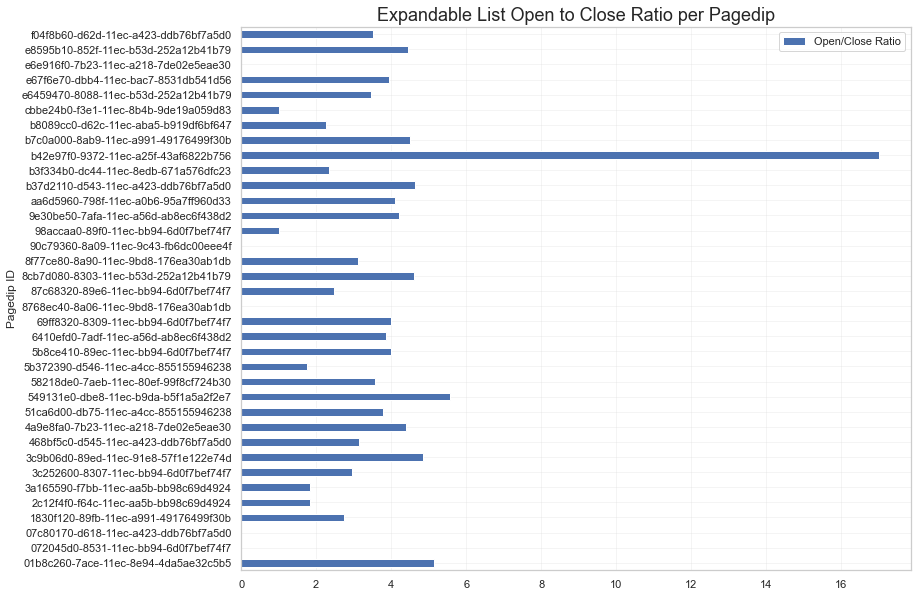

In [32]:
plt.rcParams['figure.figsize'] = (12, 10)
data = el_ocn.groupby("Pagedip ID",as_index=False)['Expandable List Opens','Expandable List Closes'].sum()

#calculating the open/close ratio
data['Open/Close Ratio'] = np.where(data['Expandable List Closes']==0,0,data['Expandable List Opens'] / data['Expandable List Closes'])

ax = data.plot(x='Pagedip ID', y='Open/Close Ratio', kind='barh')
ax.set_title('Expandable List Open to Close Ratio per Pagedip', fontsize=18)
plt.grid(b=True, alpha=.2);

I then merged the dataframes together to prepare for input into the model.

In [33]:
el_oct2 = el_oct.groupby('Pagedip ID').mean()
el_ocn2 = el_ocn.groupby('Pagedip ID').sum() 
el_df = pd.merge(right=el_oct2, left=el_ocn2, on='Pagedip ID', how='outer').fillna(0).reset_index()
el_df

,Pagedip ID,Expandable List Closes,Expandable List Opens,Expandable List Time Left Open
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,256.0,1315,5.131915
1,072045d0-8531-11ec-bb94-6d0f7bef74f7,0.0,4,0.000000
2,07c80170-d618-11ec-a423-ddb76bf7a5d0,0.0,1,0.000000
3,1830f120-89fb-11ec-a991-49176499f30b,31.0,85,6.229920
4,2c12f4f0-f64c-11ec-aa5b-bb98c69d4924,179.0,328,5.040419
5,3a165590-f7bb-11ec-aa5b-bb98c69d4924,6.0,11,2.064667
6,3c252600-8307-11ec-bb94-6d0f7bef74f7,58.0,172,4.892125
7,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,25.0,121,6.172125
8,468bf5c0-d545-11ec-a423-ddb76bf7a5d0,29.0,91,1.711800
9,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,63.0,277,3.870220


For the last part of expandable lists, I created an automated PDF that summarizes statistics for each list per the client's request.

In [34]:
el = mi.groupby(['Expandable List name','Expandable List item label'])['Expandable List item id'].count().reset_index()
el

,Expandable List name,Expandable List item label,Expandable List item id
0,Build Trust,Architecture Diagram,207
1,Build Trust,Competitive Intelligence,397
2,Build Trust,Demo Library,346
3,Build Trust,Help Customers get More Value,314
4,Customer References,Trailblazer2Win Customer References,132
...,...,...,...
98,Succeed,C360 For Industry,19
99,Succeed,ISV & Partners,13
100,Succeed,Implementation Guide,20
101,Succeed,Industry Specific Plays,14


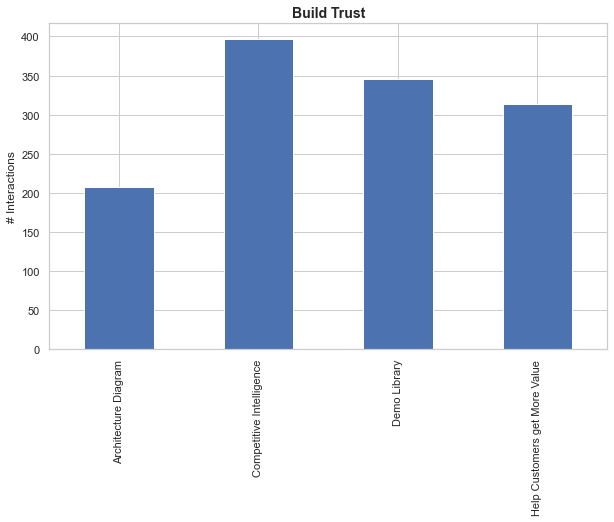

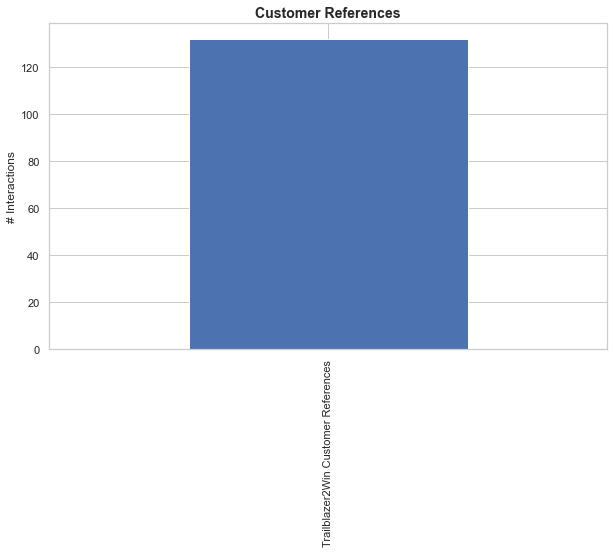

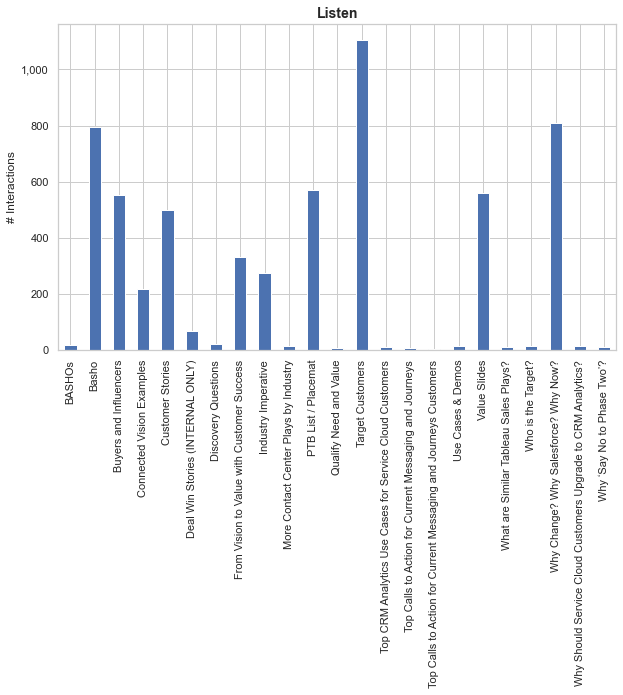

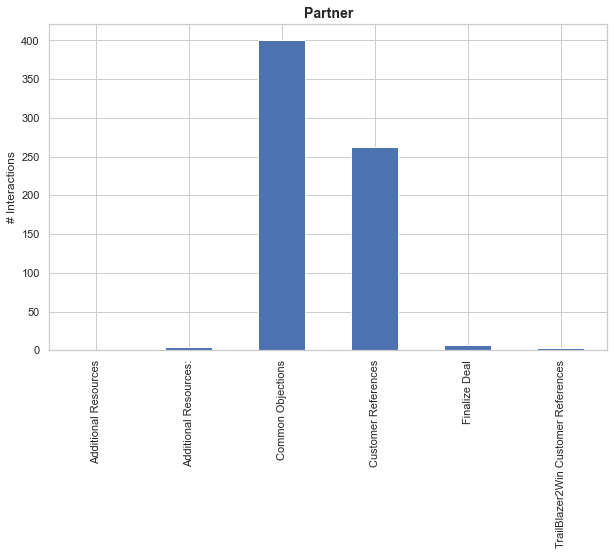

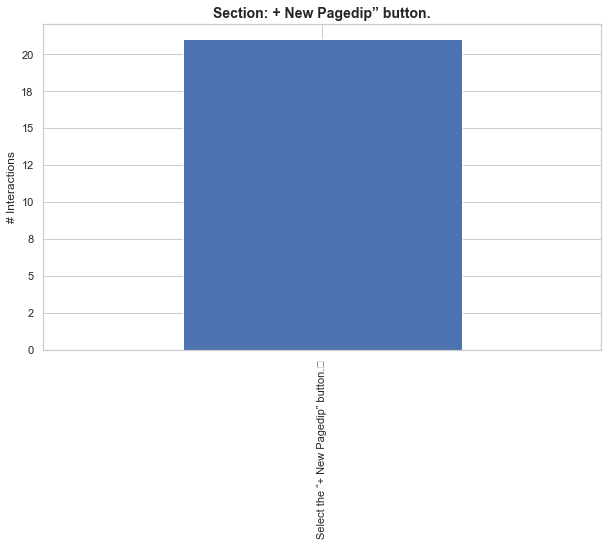

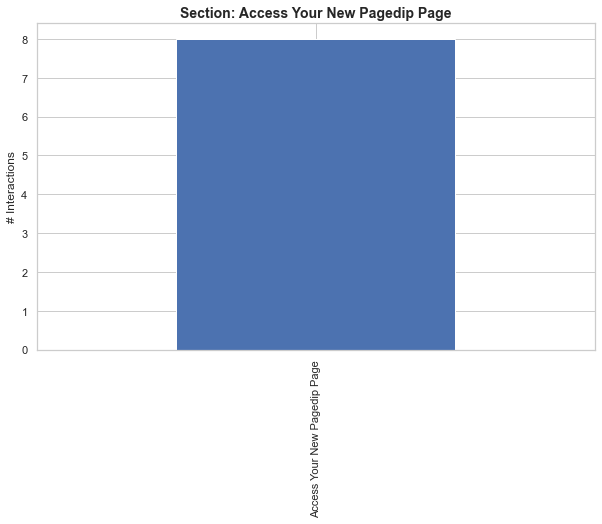

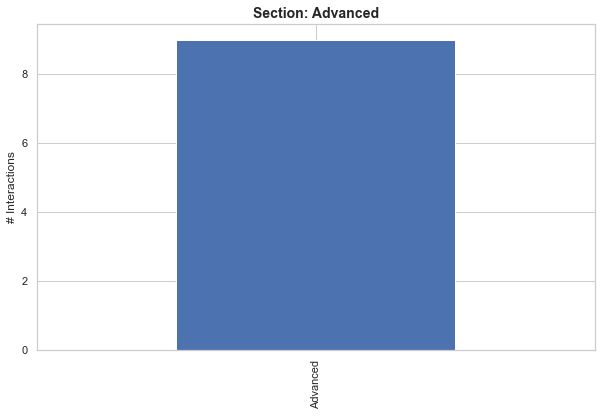

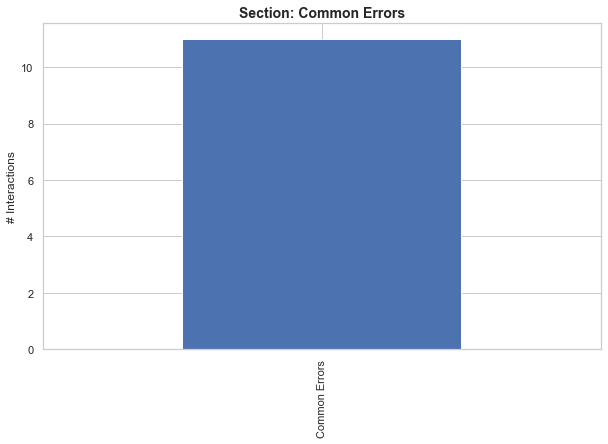

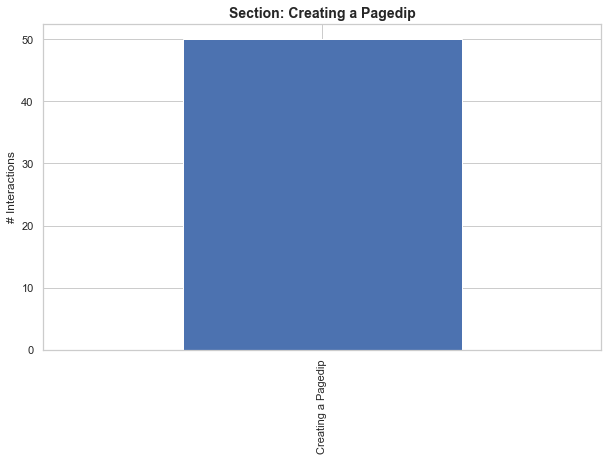

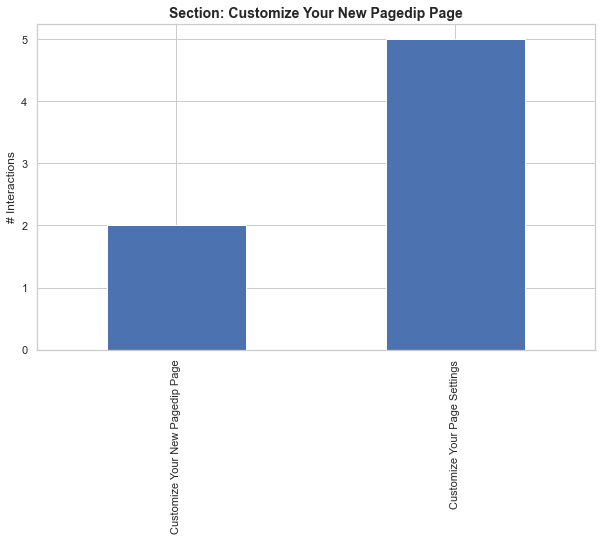

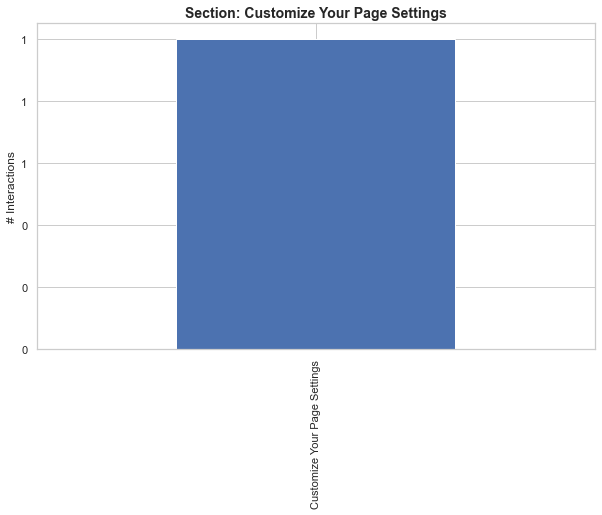

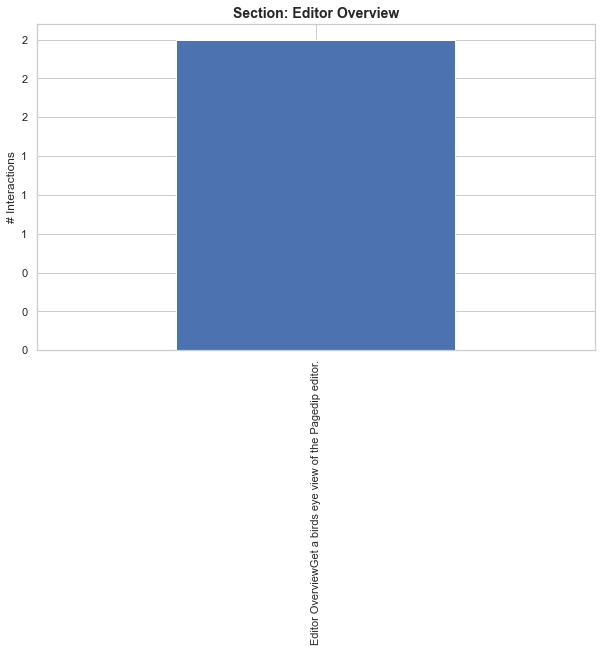

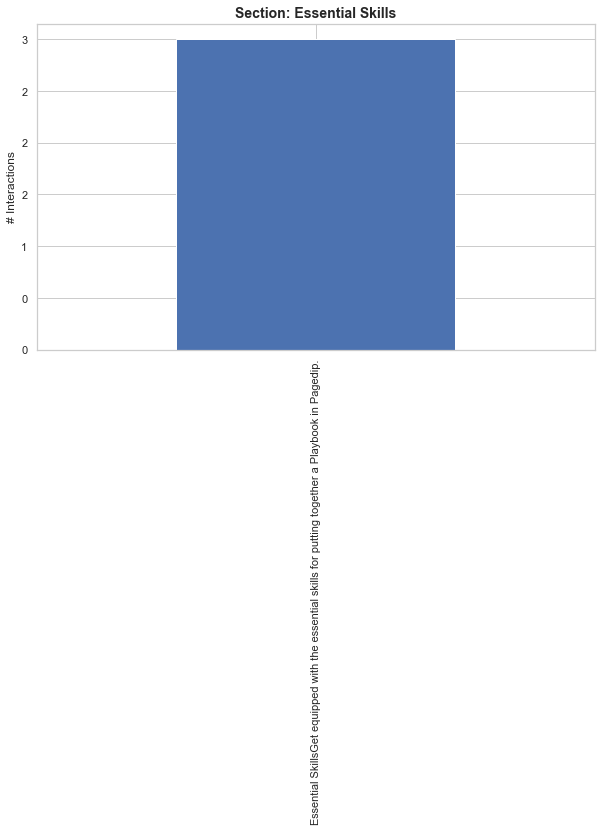

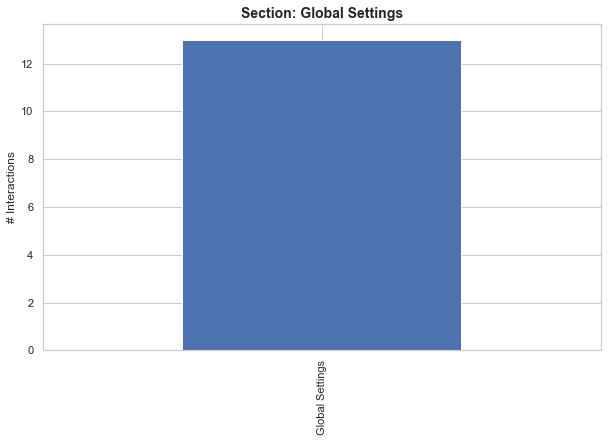

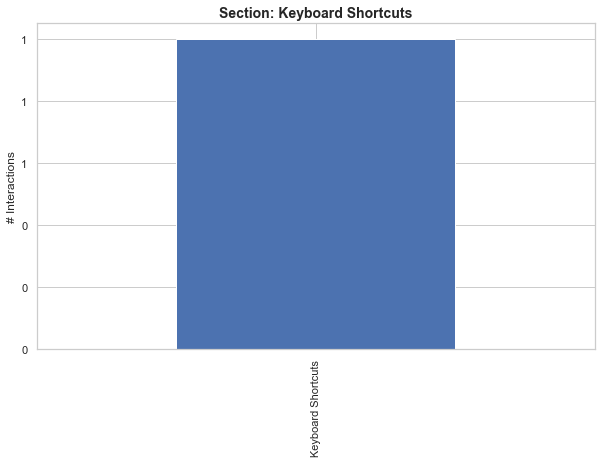

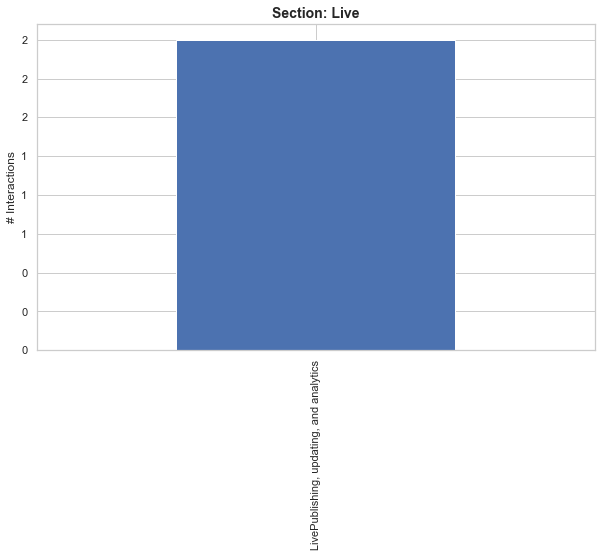

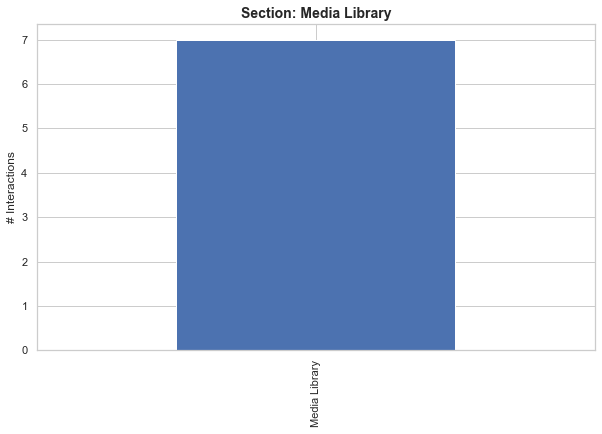

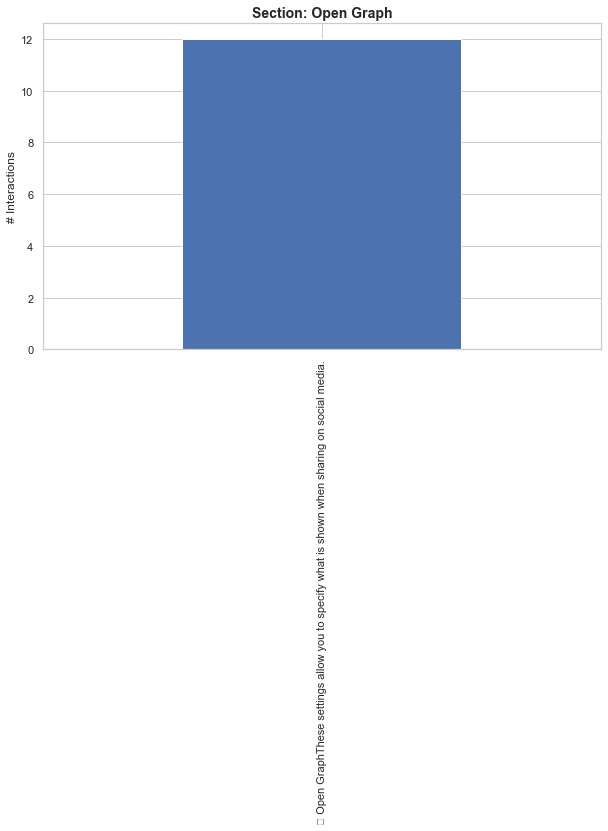

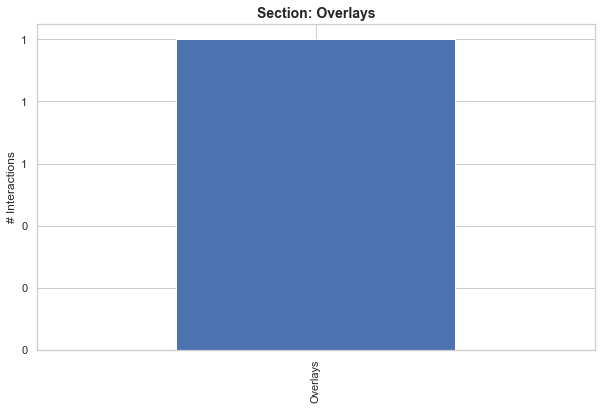

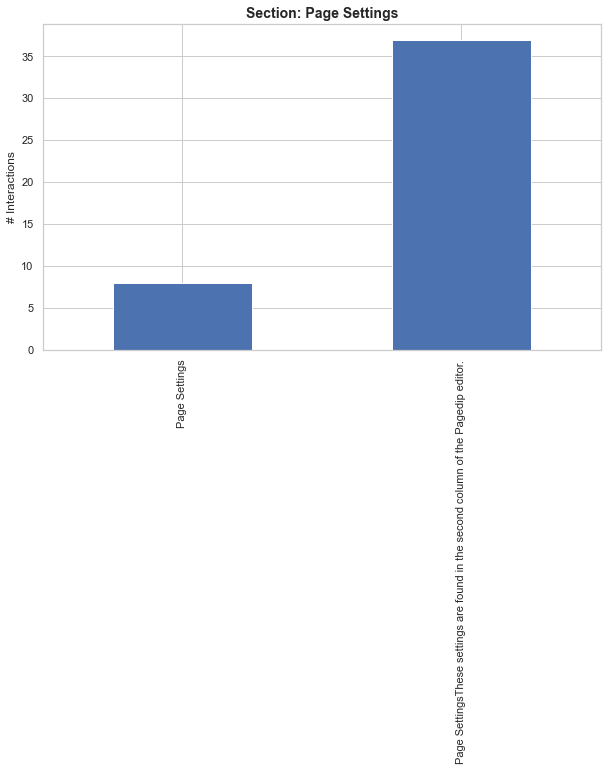

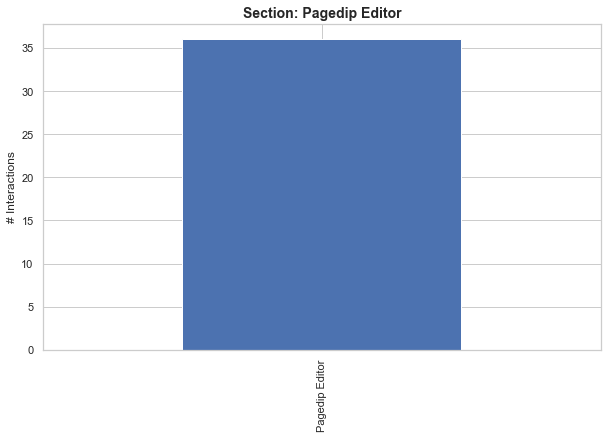

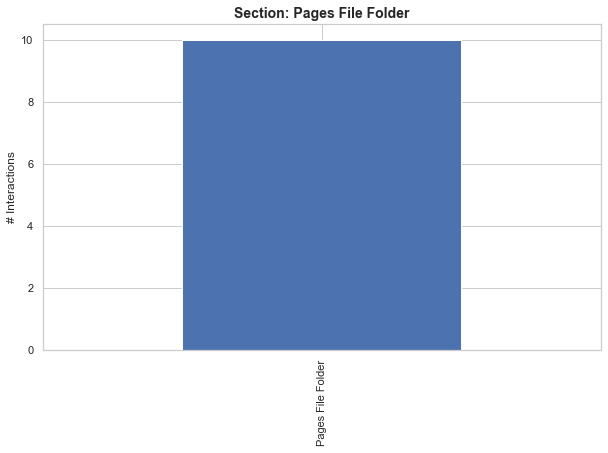

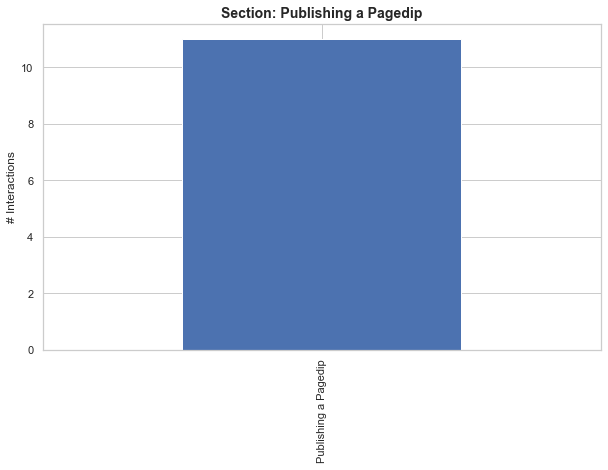

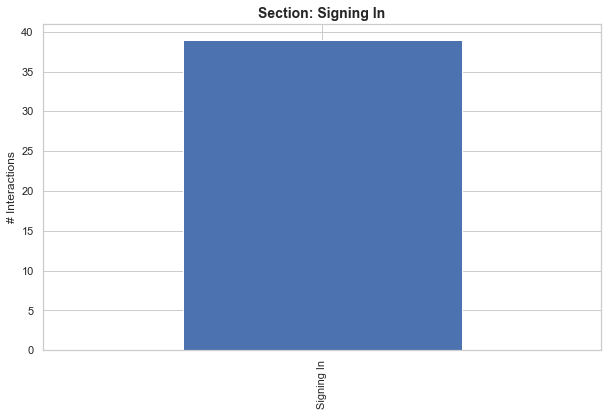

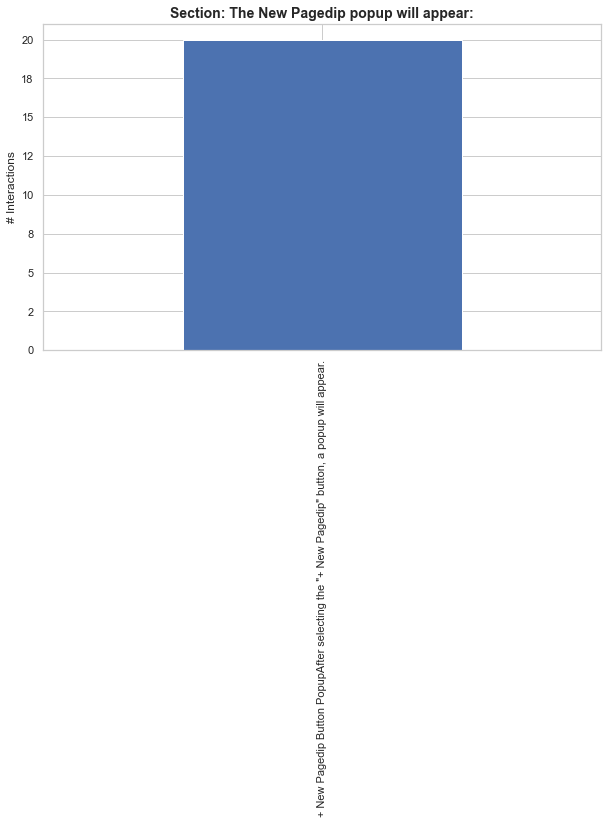

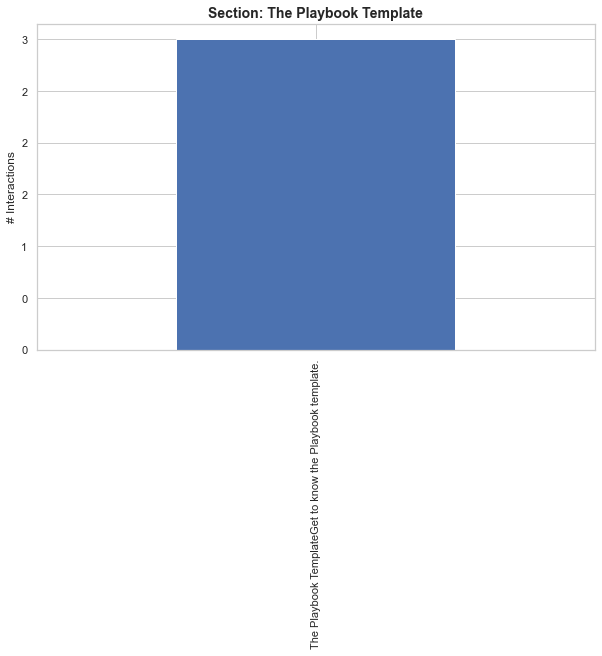

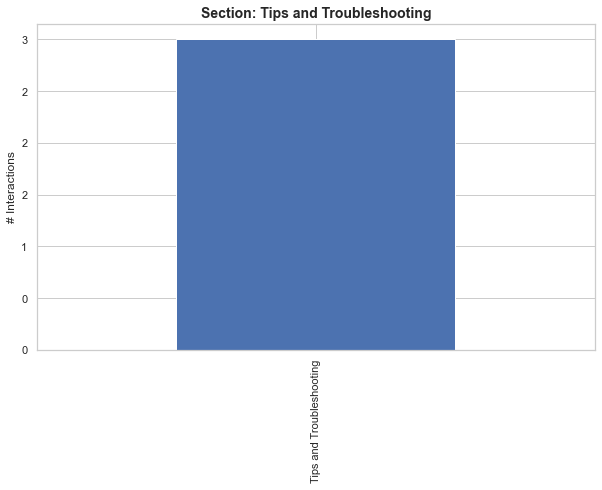

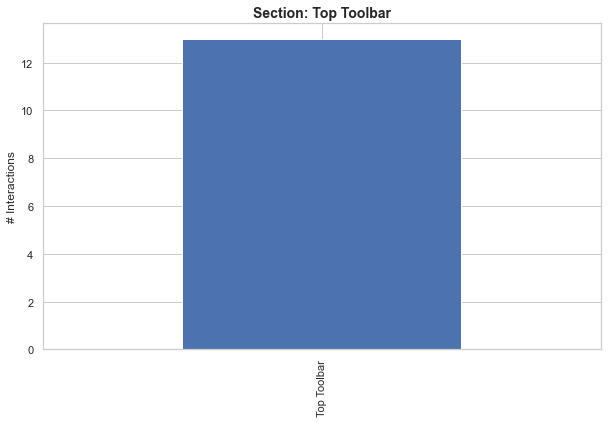

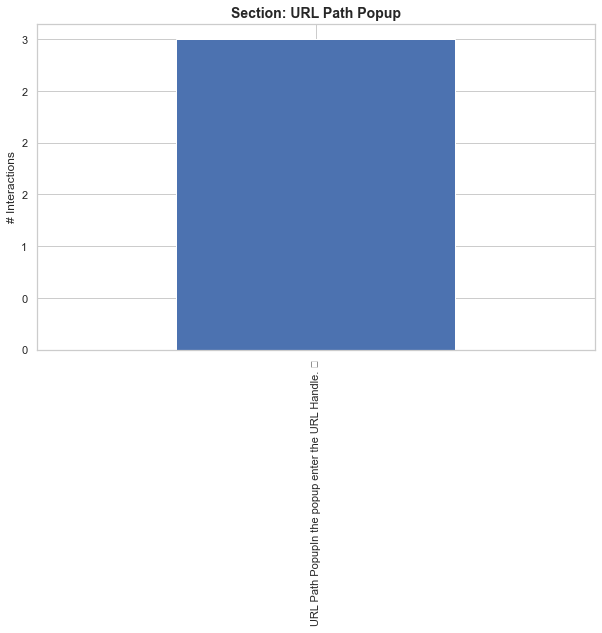

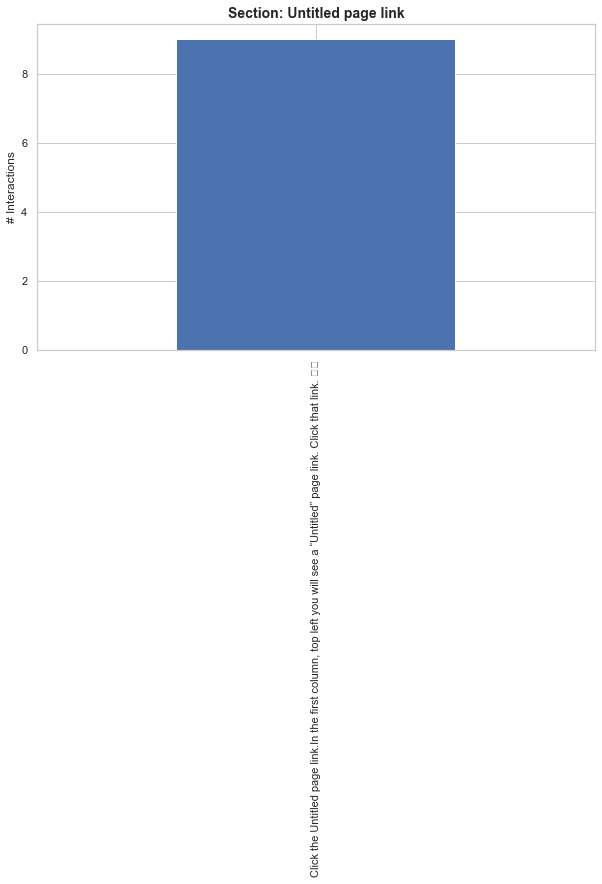

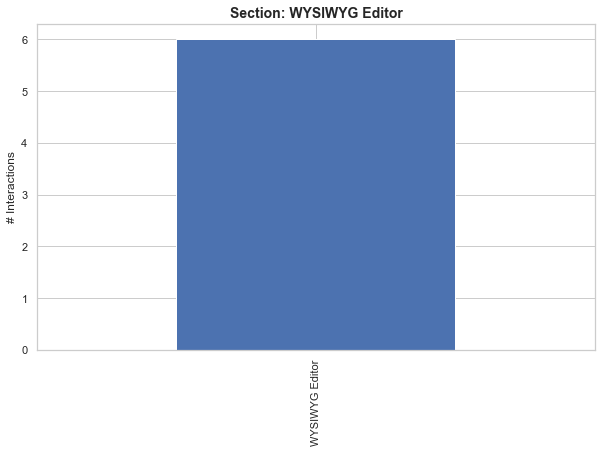

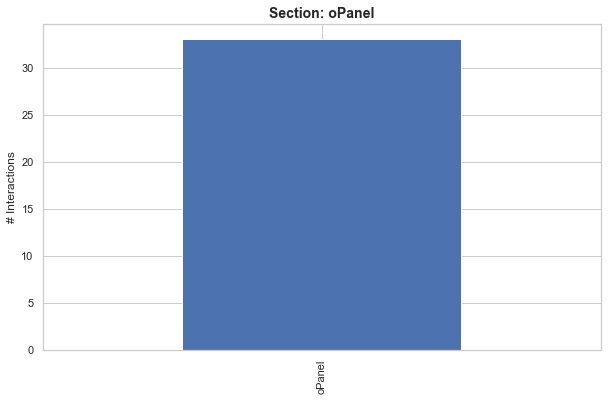

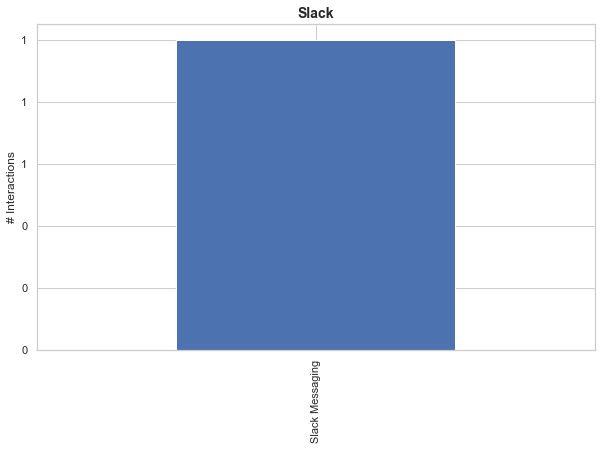

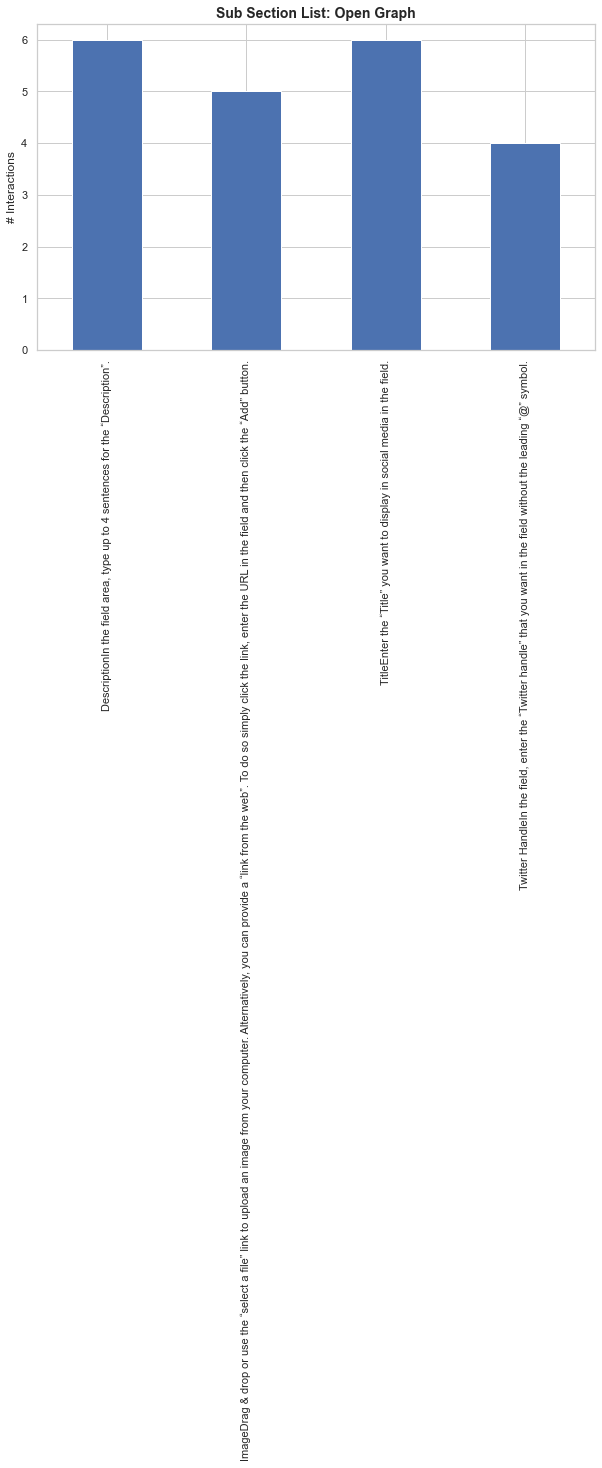

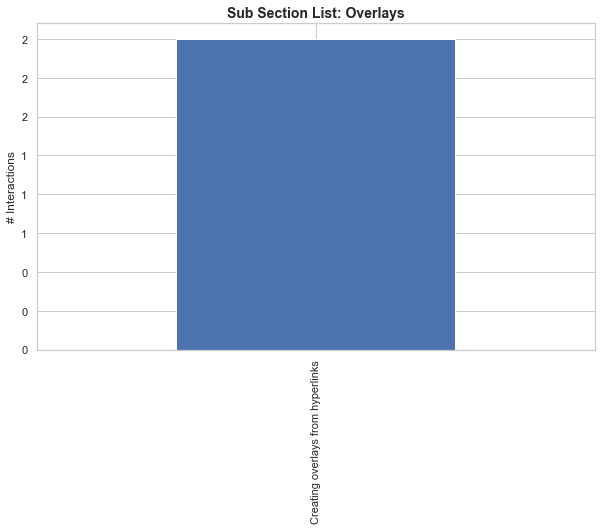

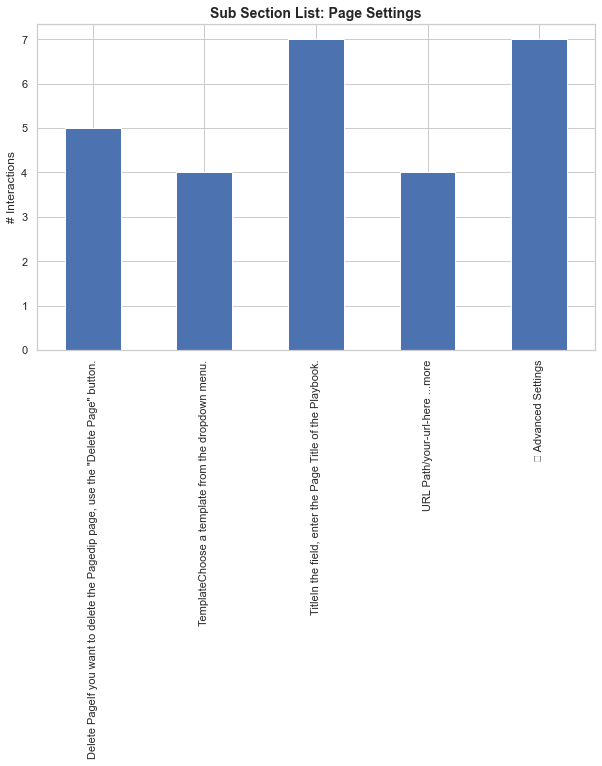

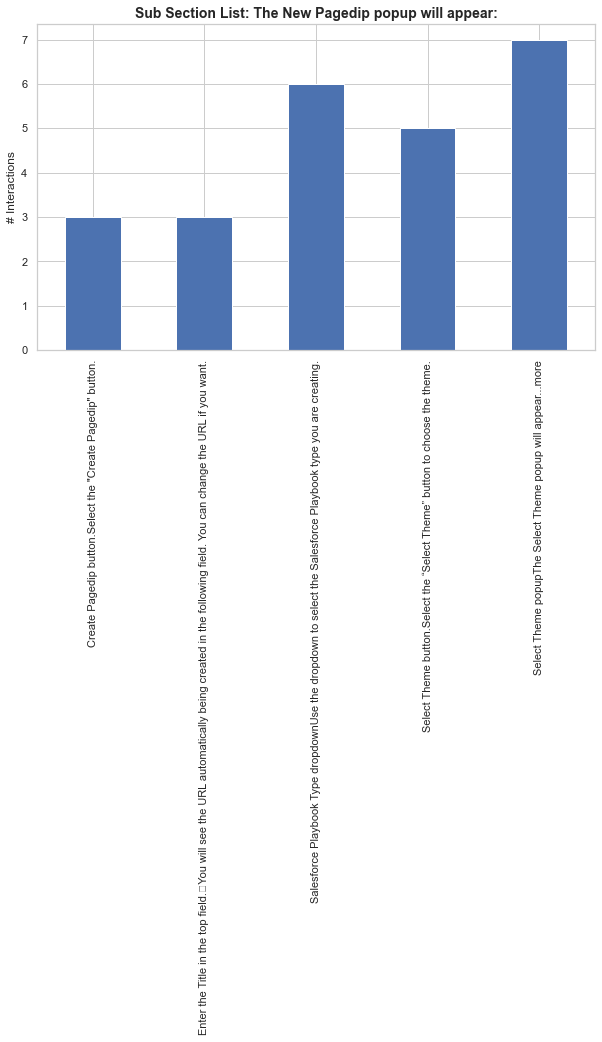

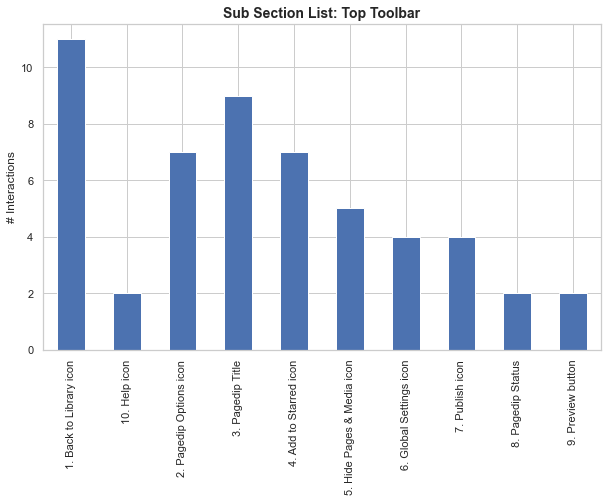

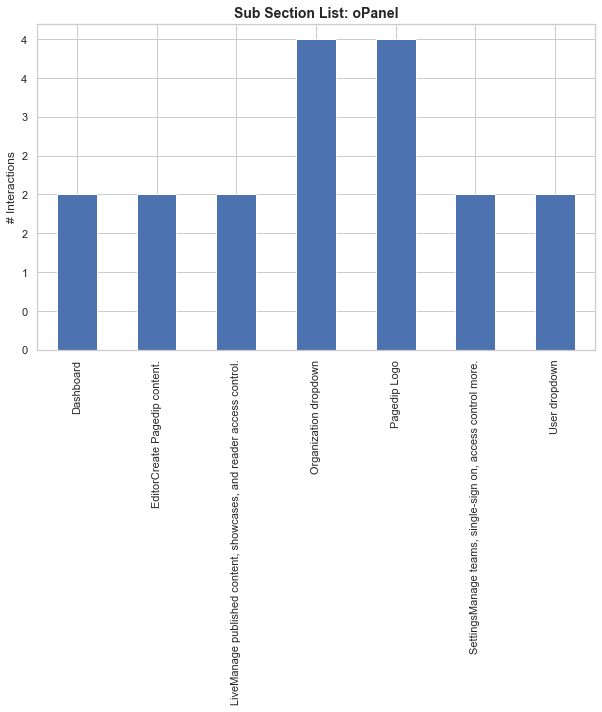

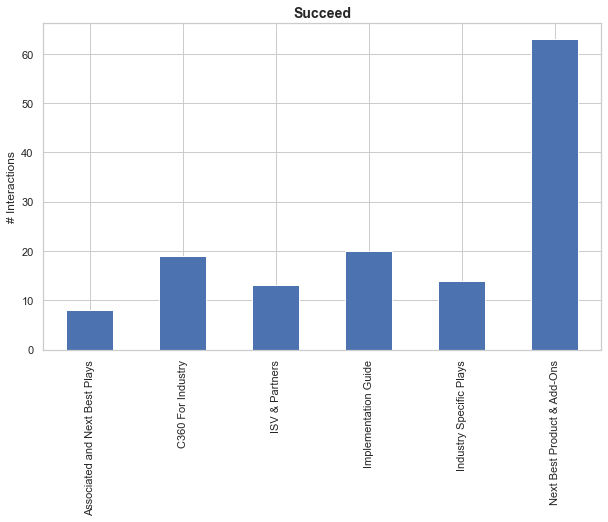

In [35]:
pp = PdfPages('Expandable_List_Interactions_Summary.pdf') 
plt.rcParams['figure.figsize'] = (10, 6)

el = el.groupby('Expandable List name')

for name, group in el:
    group.plot.bar(x='Expandable List item label')
    plt.title(name, fontsize=14, fontweight='bold')
    plt.xlabel("")
    plt.ylabel("# Interactions")
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}')) 
    plt.legend().set_visible(False)
    pp.savefig(plt.gcf())

pp.close()

#https://stackoverflow.com/questions/62315217/exporting-looped-plots-into-pdf-in-python

##### Binks
I repeated a simlar process for binks to calculate time left open per bink. I did not remove outliers as we already treated outliers for binks earlier on.

In [36]:
b_oct = mi[['Pagedip ID', 'Client session ID', 'Bink label', 'Bink interaction', 'Time left open']]
b_oct = b_oct[~b_oct['Bink interaction'].isnull()]
idx = b_oct[b_oct["Bink interaction"] == 'open'].index
b_oct.loc[idx, 'Time left open'] = \
                                b_oct.loc[idx, 'Time left open'] * (-1) 

b_oct = b_oct.groupby(['Pagedip ID','Client session ID','Bink label'],\
                     as_index=False).agg(sum)
b_oct = b_oct.loc[~((b_oct['Time left open'] < 0))] 
b_oct = b_oct.rename(columns={"Time left open": "Bink Time Left Open"})
b_oct

,Pagedip ID,Client session ID,Bink label,Bink Time Left Open
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,Salesforce’s Sales Enablement,4.757
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,07c73fd8-9979-4c53-8430-0d16a6da6787,maturity levels,0.906
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,0faa894a-d51f-44fb-ae15-86a95203073d,Sample PTB reports for X Product with PTB 4 or 5,5.798
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,10b23a7d-649e-4227-978e-d9c02be98f7f,Einstein Conversation Insights,4.274
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,153b5271-9cca-47ce-b061-1c628d394931,Salesforce’s Sales Enablement,7.981
...,...,...,...,...
233,aa6d5960-798f-11ec-a0b6-95a7ff960d33,dd16a93e-464c-44c9-a0fb-29358edf214e,Digital HQ for Sales,0.674
234,aa6d5960-798f-11ec-a0b6-95a7ff960d33,dd16a93e-464c-44c9-a0fb-29358edf214e,➥ Sample PTB reports for X Product with PTB 4 ...,31.261
235,aa6d5960-798f-11ec-a0b6-95a7ff960d33,e6246695-67a0-4e7d-962c-70d2c0979ebc,➥ Sample PTB reports for X Product with PTB 4 ...,0.000
236,aa6d5960-798f-11ec-a0b6-95a7ff960d33,f0873e0e-3fc5-460b-b9f2-b5835dfe9666,Digital HQ for Sales,31.145


I also calculated the average time a bink was left open per pagedip. Similiarly here, I looked at the average to not penalize a pagedip for having less binks than others.

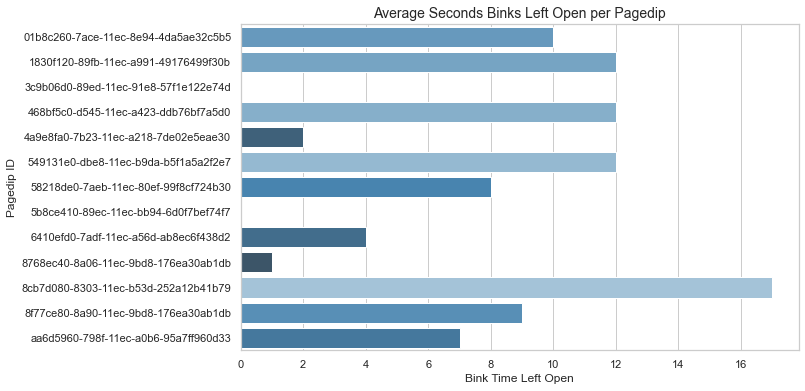

In [37]:
plt.rcParams['figure.figsize'] = (10, 6)
data = b_oct.groupby("Pagedip ID")['Bink Time Left Open'].mean().astype(int)
pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=data, y=data.index, data=b_oct, palette=np.array(pal[::-1])[rank])                                                              \

ax.set_title('Average Seconds Binks Left Open per Pagedip', fontsize=14);

In [38]:
b_oct = b_oct.groupby('Pagedip ID')['Bink Time Left Open'].mean().reset_index()
b_oct

,Pagedip ID,Bink Time Left Open
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,10.862972
1,1830f120-89fb-11ec-a991-49176499f30b,12.121714
2,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,0.885500
3,468bf5c0-d545-11ec-a423-ddb76bf7a5d0,12.040667
4,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,2.673600
5,549131e0-dbe8-11ec-b9da-b5f1a5a2f2e7,12.611778
6,58218de0-7aeb-11ec-80ef-99f8cf724b30,8.842564
7,5b8ce410-89ec-11ec-bb94-6d0f7bef74f7,0.467000
8,6410efd0-7adf-11ec-a56d-ab8ec6f438d2,4.876833
9,8768ec40-8a06-11ec-9bd8-176ea30ab1db,1.014000


I then looked at the differences on a Pagedip level between # of Closes and # of Opens. Similar to expandable lists, they were consistent from pagedip to pagedip.

In [39]:
b_on= mi[['Pagedip ID', 'Client session ID', 'Bink label', 'Bink interaction',\
                  'Time left open']]
b_on = b_on[b_on['Bink interaction'] == 'open']
b_on = b_on.groupby('Pagedip ID').size().reset_index()
b_on = b_on.rename(columns={0: "Bink Opens"})
b_on

b_cn= mi[['Pagedip ID', 'Client session ID', 'Bink label', 'Bink interaction',\
                  'Time left open']]
b_cn = b_cn[b_cn['Bink interaction'] == 'close']
b_cn = b_cn.groupby('Pagedip ID').size().reset_index()
b_cn = b_cn.rename(columns={0: "Bink Closes"})
b_cn

b_ocn = pd.merge(right=b_on, left=b_cn, on=['Pagedip ID'], how='outer').fillna(0)
b_ocn

,Pagedip ID,Bink Closes,Bink Opens
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,91,100
1,1830f120-89fb-11ec-a991-49176499f30b,13,13
2,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,2,2
3,468bf5c0-d545-11ec-a423-ddb76bf7a5d0,3,3
4,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,4,6
5,549131e0-dbe8-11ec-b9da-b5f1a5a2f2e7,18,24
6,58218de0-7aeb-11ec-80ef-99f8cf724b30,45,47
7,5b8ce410-89ec-11ec-bb94-6d0f7bef74f7,2,2
8,6410efd0-7adf-11ec-a56d-ab8ec6f438d2,24,26
9,8768ec40-8a06-11ec-9bd8-176ea30ab1db,1,1


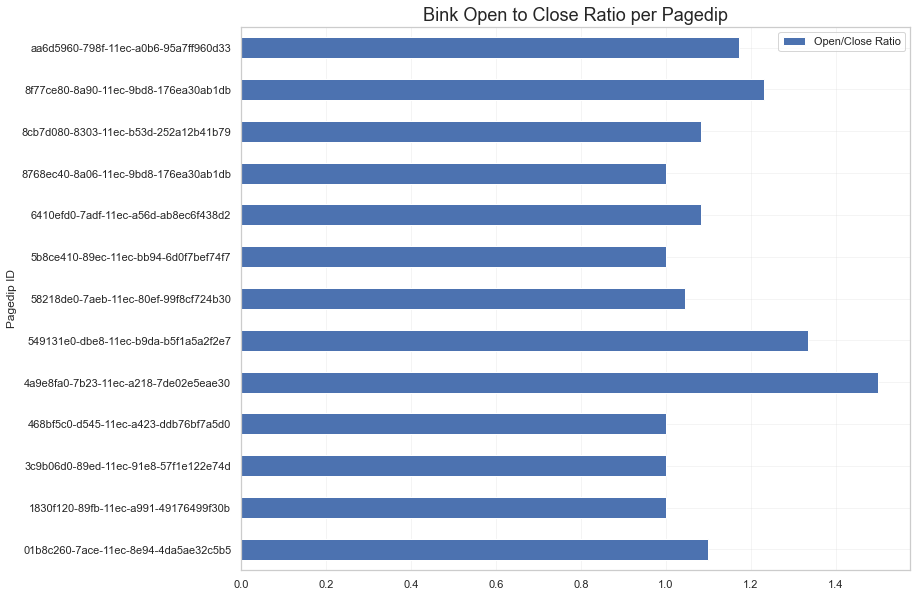

In [40]:
plt.rcParams['figure.figsize'] = (12, 10)
data = b_ocn.groupby("Pagedip ID",as_index=False)['Bink Opens','Bink Closes'].sum()
data['Open/Close Ratio'] = np.where(data['Bink Closes']==0,0,data['Bink Opens'] / data['Bink Closes'])

ax = data.plot(x='Pagedip ID', y='Open/Close Ratio', kind='barh')
ax.set_title('Bink Open to Close Ratio per Pagedip', fontsize=18)
plt.grid(b=True, alpha=.2);

Lastly I merged the dataframes together to prepare for input into the model.

In [41]:
b_df = pd.merge(right=b_ocn, left=b_oct, on=['Pagedip ID'], how='outer').fillna(0)
b_df

,Pagedip ID,Bink Time Left Open,Bink Closes,Bink Opens
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,10.862972,91,100
1,1830f120-89fb-11ec-a991-49176499f30b,12.121714,13,13
2,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,0.885500,2,2
3,468bf5c0-d545-11ec-a423-ddb76bf7a5d0,12.040667,3,3
4,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,2.673600,4,6
5,549131e0-dbe8-11ec-b9da-b5f1a5a2f2e7,12.611778,18,24
6,58218de0-7aeb-11ec-80ef-99f8cf724b30,8.842564,45,47
7,5b8ce410-89ec-11ec-bb94-6d0f7bef74f7,0.467000,2,2
8,6410efd0-7adf-11ec-a56d-ab8ec6f438d2,4.876833,24,26
9,8768ec40-8a06-11ec-9bd8-176ea30ab1db,1.014000,1,1


#### Tab-Its
I repeated the process for tab-its as well. This calculation was a bit more simple as I only needed to aggregate the difference between the min and max time within the tab name. I dropped any values outside of the interquartile range to remove outliers. I did not calculate opens and closes since it is not relevant for tab-its.

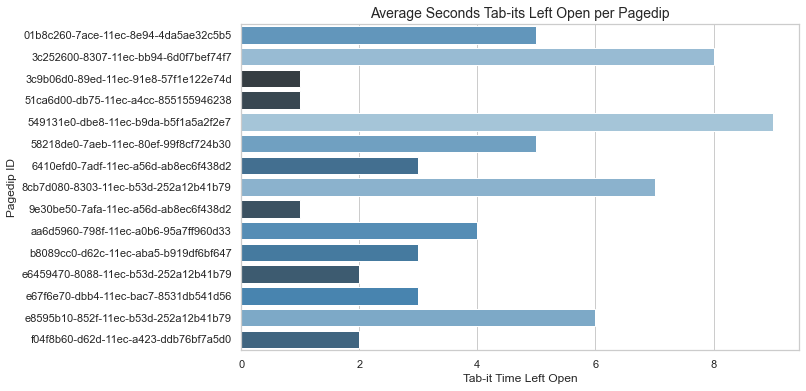

In [42]:
occT = mi[['Pagedip ID', 'Client session ID', 'Date', 'Tabs name', 'Tabs interaction',\
                   'Time on page when interaction happened']]
occT = occT[occT['Tabs interaction'].isnull()==False]

occTG = occT.groupby('Pagedip ID')\
                    ['Tabs interaction'].count().reset_index()

occTT = occT.groupby(['Pagedip ID','Client session ID','Date','Tabs name',\
                 'Tabs interaction'\
                  ])['Time on page when interaction happened']\
                  .agg(['min','max']).diff(axis=1).reset_index()

occTT = occTT.drop(['min'],axis=1)
occTT = occTT.rename(columns={"max": "Tab-it Time Left Open"})

occTT = occTT.loc[~((occTT['Tab-it Time Left Open'] < 0))] 

IQR = Q3-Q1
droprange= occTT[(occTT['Tab-it Time Left Open'] < (Q1-1.5*IQR)) | (occTT['Tab-it Time Left Open'] > (Q3+1.5*IQR)) | (occTT['Tab-it Time Left Open'] == 0) ].index
occTT.drop(droprange, inplace=True)

occTT = occTT.groupby("Pagedip ID")['Tab-it Time Left Open'].mean().reset_index()

plt.rcParams['figure.figsize'] = (10, 6)
data = occTT.groupby("Pagedip ID")['Tab-it Time Left Open'].mean().astype(int)
pal = sns.color_palette("Blues_d", len(data))
rank = data.argsort().argsort() 
ax = sns.barplot(x=data, y=data.index, data=occTT, palette=np.array(pal[::-1])[rank])                                                              \

ax.set_title('Average Seconds Tab-its Left Open per Pagedip', fontsize=14);

In [43]:
ocTf = pd.merge(left=occTT, right=occTG, on='Pagedip ID', how='outer')
ocTf

,Pagedip ID,Tab-it Time Left Open,Tabs interaction
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,5.119000,31
1,3c252600-8307-11ec-bb94-6d0f7bef74f7,8.174632,83
2,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,1.742000,3
3,51ca6d00-db75-11ec-a4cc-855155946238,1.255500,9
4,549131e0-dbe8-11ec-b9da-b5f1a5a2f2e7,9.110333,16
5,58218de0-7aeb-11ec-80ef-99f8cf724b30,5.890500,9
6,6410efd0-7adf-11ec-a56d-ab8ec6f438d2,3.723667,7
7,8cb7d080-8303-11ec-b53d-252a12b41b79,7.210833,165
8,9e30be50-7afa-11ec-a56d-ab8ec6f438d2,1.750000,10
9,aa6d5960-798f-11ec-a0b6-95a7ff960d33,4.760000,14


### Widget Idiosyncracy Adjustments
First, I removed closes since it is not necessary to close. It is a personal preference and likely dependent on length of content. Given that, it will add noise and some duplication to our model. I only kept closes for overlays to not eliminate this widget.

In [44]:
mic = mi[['Pagedip ID','Client session ID', 'Expandable List interaction', 'Tab number', 'Vidyard interaction', 'Slide index', \
          'Overlay interaction', 'Bink interaction']]

In [45]:
# select columns containing 'close'
c = mic.loc[: , (mic == 'close').any()]
c

,Expandable List interaction,Overlay interaction,Bink interaction
5,NaN,NaN,NaN
9,open,NaN,NaN
10,close,NaN,NaN
11,open,NaN,NaN
12,close,NaN,NaN
...,...,...,...
26588,NaN,NaN,close
26589,NaN,NaN,close
26590,NaN,NaN,close
26591,NaN,NaN,close


In [46]:
#replace overlay close with X to more easily keep these values and remove all other closes
mic['Overlay interaction'] = mic['Overlay interaction'].replace('close', 'X', regex=True)

In [47]:
mic['Overlay interaction'].value_counts()

X    1738
Name: Overlay interaction, dtype: int64

I removed close from the other columns. I also prepared the null data for encoding by changing nulls to 'nan'.

In [48]:
#Changing 'close' to nan
mic = mic.replace('close', 'nan', regex=True)
mic = mic.replace(np.nan, 'nan', regex=True)

In [49]:
mic['Expandable List interaction'].value_counts()

nan     11650
open     6821
Name: Expandable List interaction, dtype: int64

##### Tab-its and Sliders

For both tab-its and sliders, data is not collected on tab 1 or slide 1 unless a user clicks *back* to that tab or slide. To more accurately account for engagement, I added 1 where tab 2 or slide 2 is 1 and tab 1 or slide 1 is 0. This assumes that anyone who clicked on the 2nd tab or slide more than likely saw the first tab or slide as well.

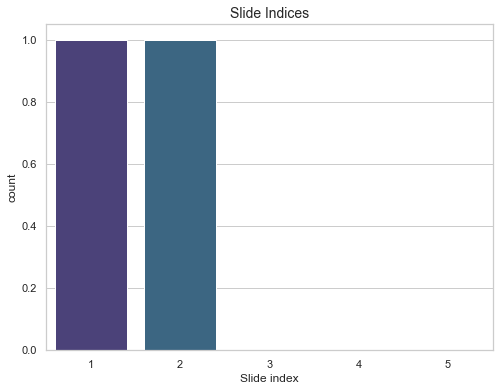

In [50]:
fig = plt.figure(figsize=(8,6))
fig.patch.set(facecolor = "white")
ax = sns.countplot(data=mi, x='Slide index', order=[1,2,3,4,5], palette='viridis')
ax.set_title("Slide Indices", fontsize = 14);

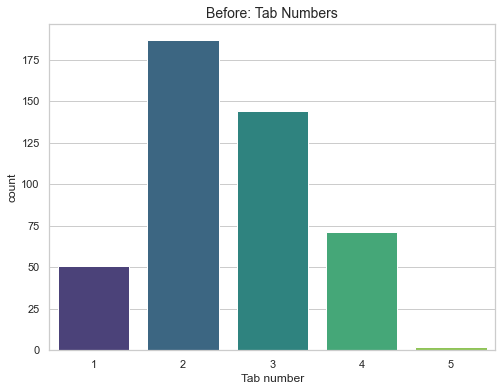

In [51]:
fig = plt.figure(figsize=(8,6))
fig.patch.set(facecolor = "white")
ax = sns.countplot(data=mi, x='Tab number', order=[1,2,3,4,5], palette='viridis')
ax.set_title("Before: Tab Numbers", fontsize = 14);

To make this adjustment, we need to transpose the tab and slide number columns. To do this I first made a counter column that takes count of each slide and tab interaction. 

In [52]:
#If the tab number is greater than 0, count 1
mic['Tab number'] = mic['Tab number'].replace('nan', 0)
mic['Tab number'] = mic['Tab number'].astype(int)
mic['Tab count'] = np.where(mic['Tab number'].isnull(),0,1)

In [53]:
mic.head(50)

,Pagedip ID,Client session ID,Expandable List interaction,Tab number,Vidyard interaction,Slide index,Overlay interaction,Bink interaction,Tab count
5,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,nan,0,play,nan,nan,nan,1
9,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,open,0,nan,nan,nan,nan,1
10,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,nan,0,nan,nan,nan,nan,1
11,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,open,0,nan,nan,nan,nan,1
12,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,nan,0,nan,nan,nan,nan,1
13,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,open,0,nan,nan,nan,nan,1
14,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,nan,0,nan,nan,nan,nan,1
15,e67f6e70-dbb4-11ec-bac7-8531db541d56,4281f5a9-5859-4cda-a54e-094926158046,nan,0,nan,nan,nan,nan,1
16,e67f6e70-dbb4-11ec-bac7-8531db541d56,4281f5a9-5859-4cda-a54e-094926158046,nan,0,nan,nan,nan,nan,1
20,e6459470-8088-11ec-b53d-252a12b41b79,83a52296-121b-4f5e-ba51-57768b9a2c6a,nan,0,nan,nan,nan,nan,1


In [54]:
#If the slide index is greater than 0, count 1
mic['Slide index'] = mic['Slide index'].replace('nan', 0)
mic['Slide index'] = mic['Slide index'].astype(int)
mic['Slider count'] = np.where(mic['Slide index']>0,1,0)

In [55]:
mic.head()

,Pagedip ID,Client session ID,Expandable List interaction,Tab number,Vidyard interaction,Slide index,Overlay interaction,Bink interaction,Tab count,Slider count
5,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,nan,0,play,0,nan,nan,1,0
9,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,open,0,nan,0,nan,nan,1,0
10,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,nan,0,nan,0,nan,nan,1,0
11,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,open,0,nan,0,nan,nan,1,0
12,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,nan,0,nan,0,nan,nan,1,0


Next I transposed the slide and tab columns and summed up the counter columns.

In [56]:
cols = [x for x in mic.columns if x != 'Tab number' and x != 'Tab count' and x != 'Slide index' and x != 'Slider count'] 
cols

['Pagedip ID',
 'Client session ID',
 'Expandable List interaction',
 'Vidyard interaction',
 'Overlay interaction',
 'Bink interaction']

In [57]:
mi_pT = mic.pivot_table(
    values='Tab count',
    index= cols,
    columns='Tab number', aggfunc=np.sum
    ).add_prefix('Tab ').reset_index()

In [58]:
mi_pT

Tab number,Pagedip ID,Client session ID,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Tab 0,Tab 1,Tab 2,Tab 3,Tab 4,Tab 5,Tab 6
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,open,nan,nan,nan,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,open,nan,nan,nan,2.0,NaN,NaN,NaN,NaN,NaN,NaN
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,nan,10.0,NaN,NaN,NaN,NaN,NaN,NaN
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,open,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,open,nan,nan,nan,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,nan,nan,nan,nan,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3552,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,open,nan,nan,nan,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3553,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,open,nan,nan,nan,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3554,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,nan,nan,nan,nan,5.0,1.0,NaN,1.0,NaN,NaN,NaN


In [59]:
mi_pS = mic.pivot_table(
    values='Slider count',
    index= cols,
    columns='Slide index', aggfunc=np.sum
    ).add_prefix('Slide ').reset_index()

In [60]:
mi_pS

Slide index,Pagedip ID,Client session ID,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Slide 0,Slide 1,Slide 2
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,open,nan,nan,nan,0.0,NaN,NaN
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,open,nan,nan,nan,0.0,NaN,NaN
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,nan,0.0,NaN,NaN
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,open,0.0,NaN,NaN
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,open,nan,nan,nan,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3551,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,nan,nan,nan,nan,0.0,NaN,NaN
3552,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,open,nan,nan,nan,0.0,NaN,NaN
3553,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,open,nan,nan,nan,0.0,NaN,NaN
3554,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,nan,nan,nan,nan,0.0,NaN,NaN


In [61]:
mip = pd.merge(right=mi_pT, left=mi_pS, how='outer').fillna(0)
mip

,Pagedip ID,Client session ID,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Slide 0,Slide 1,Slide 2,Tab 0,Tab 1,Tab 2,Tab 3,Tab 4,Tab 5,Tab 6
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,open,nan,nan,nan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,open,nan,nan,nan,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,nan,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,open,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,open,nan,nan,nan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,nan,nan,nan,nan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3552,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,open,nan,nan,nan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3553,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,open,nan,nan,nan,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3554,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,nan,nan,nan,nan,0.0,0.0,0.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0


In [62]:
#Remove Slide and Tab 0
mip = mip.drop(['Slide 0'], axis=1)
mip = mip.drop(['Tab 0'], axis=1)
mip

,Pagedip ID,Client session ID,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Slide 1,Slide 2,Tab 1,Tab 2,Tab 3,Tab 4,Tab 5,Tab 6
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,open,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3552,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3553,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3554,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,nan,nan,nan,nan,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


Finally I added 1 where Tab 1 is 0 but Tab 2 is greater than 0, and the same for Sliders.

Please note: I had challenges overwriting Slide 1 and Tab 1 columns, so I made new ones with the below formula and deleted the old. I also dropped any columns that had a null Pagedip ID since we are evaluating performance by Pagedip ID.

In [63]:
try:
    mip['Tab 1 New'] = np.where((mip['Tab 1']==0) & (mip['Tab 2'])>0,1,mip['Tab 1'])
except:
    mip['Tab 1 New'] = mip['Tab 1']

In [64]:
try:
    mip['Slide 1 New'] = np.where((mip['Slide 1']==0) & (mip['Slide 2'])>0,1,mip['Slide 1'])
except:
    mip['Slide 1 New'] = mip['Slide 1']

In [65]:
mip

,Pagedip ID,Client session ID,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Slide 1,Slide 2,Tab 1,Tab 2,Tab 3,Tab 4,Tab 5,Tab 6,Tab 1 New,Slide 1 New
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,open,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3552,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3553,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3554,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,nan,nan,nan,nan,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [66]:
mip = mip[mip['Pagedip ID'] != 0]
mip = mip.drop(['Slide 1'], axis=1)
mip = mip.drop(['Tab 1'], axis=1)
mip = mip.rename(columns = {'Slide 1 New':'Slide 1', 'Tab 1 New':'Tab 1'})
mip

,Pagedip ID,Client session ID,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Slide 2,Tab 2,Tab 3,Tab 4,Tab 5,Tab 6,Tab 1,Slide 1
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,nan,nan,nan,open,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,nan,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3552,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3553,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,open,nan,nan,nan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3554,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,nan,nan,nan,nan,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#### Transformation Results
The end result after applying the logic. Tab 1 is reasonably higher.

Please note: I did not focus on demonstrating slider results for this analysis given that feature's limited data, however I kept it in the transformation process to account for future datasets.

In [67]:
from itertools import repeat
Tabs = []
for x in mip['Tab 1']:
    if x > 0:
        Tabs.extend(repeat(1,int(x)))
    
for x in mip['Tab 2']:
    if x > 0:
        Tabs.extend(repeat(2,int(x)))

for x in mip['Tab 3']:
    if x > 0:
        Tabs.extend(repeat(3,int(x)))  

for x in mip['Tab 4']:
    if x > 0:
        Tabs.extend(repeat(4,int(x)))   

for x in mip['Tab 5']:
    if x > 0:
        Tabs.extend(repeat(5,int(x))) 

tabs2 = pd.DataFrame(Tabs)
tabs2 = pd.DataFrame(tabs2.value_counts(), columns=['count']).reset_index()
tabs2

,0,count
0,2,187
1,1,156
2,3,144
3,4,71
4,5,2


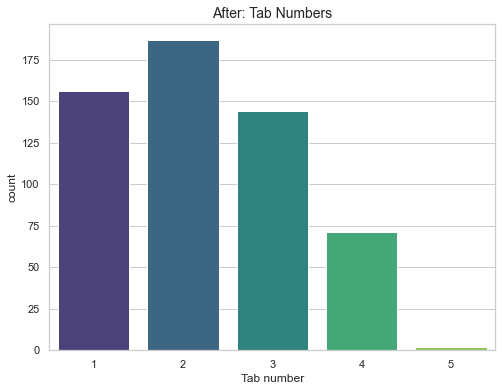

In [68]:
rcParams['figure.figsize'] = 8,6
p = sns.barplot(data=tabs2, x=0, y='count', palette='viridis')
p.set_xlabel("Tab number")
p.set_title("After: Tab Numbers", fontsize = 14);

### Encoding non-numerical columns
Since I'm feeding data into a K-Means model, we need to change all data to numerical.

In [69]:
mip.dtypes

Pagedip ID                      object
Client session ID               object
Expandable List interaction     object
Vidyard interaction             object
Overlay interaction             object
Bink interaction                object
Slide 2                        float64
Tab 2                          float64
Tab 3                          float64
Tab 4                          float64
Tab 5                          float64
Tab 6                          float64
Tab 1                          float64
Slide 1                        float64
dtype: object

In [70]:
le = LabelEncoder()

In [71]:
for col in mip:
    if 'Tab ' in col or 'Slide ' in col:
        mip[col] = mip[col].fillna(0).astype('int')
    elif col == 'Pagedip ID' or col == 'Client session ID':
        mip[col] = mip[col]
    else:
        mip[col] = le.fit_transform(mip[col])

In [72]:
mip.dtypes

Pagedip ID                     object
Client session ID              object
Expandable List interaction     int32
Vidyard interaction             int32
Overlay interaction             int32
Bink interaction                int32
Slide 2                         int32
Tab 2                           int32
Tab 3                           int32
Tab 4                           int32
Tab 5                           int32
Tab 6                           int32
Tab 1                           int32
Slide 1                         int32
dtype: object

In [73]:
mip

,Pagedip ID,Client session ID,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Slide 2,Tab 2,Tab 3,Tab 4,Tab 5,Tab 6,Tab 1,Slide 1
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,1,0,1,0,0,0,0,0,0,0,0,0
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,1,0,1,0,0,0,0,0,0,0,0,0
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,0,0,1,0,0,0,0,0,0,0,0,0
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,0,0,1,1,0,0,0,0,0,0,0,0
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,0,0,1,0,0,0,0,0,0,0,0,0
3552,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,1,0,1,0,0,0,0,0,0,0,0,0
3553,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,1,0,1,0,0,0,0,0,0,0,0,0
3554,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,0,0,1,0,0,0,1,0,0,0,1,0


### Preparing the final dataframe

The next section is focused on piecing together the final dataframe for our model input.

To simplify our analysis, we can sum up all Tab and Sliders into a single metric.

In [74]:
mip['Tab-it Opens'] = mip.loc[:,mip.columns.str.contains('Tab ')].sum(axis=1)
mip['Slider Opens'] = mip.loc[:,mip.columns.str.contains('Slide ')].sum(axis=1)
mip

,Pagedip ID,Client session ID,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Slide 2,Tab 2,Tab 3,Tab 4,Tab 5,Tab 6,Tab 1,Slide 1,Tab-it Opens,Slider Opens
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,1,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3551,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3552,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3553,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3554,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,0,0,1,0,0,0,1,0,0,0,1,0,2,0


I then dropped the individual Tab and Slide columns.

In [75]:
mip = mip.drop(mip.loc[:,mip.columns.str.contains('Tab ')], axis=1)
mip = mip.drop(mip.loc[:,mip.columns.str.contains('Slide ')], axis=1)
mip

,Pagedip ID,Client session ID,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Tab-it Opens,Slider Opens
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f1bc19-b757-438f-a52a-2028a56e2951,1,0,1,0,0,0
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,03f7c5a6-7b30-4da3-ba59-54f75dcf5179,1,0,1,0,0,0
2,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,0,0,1,0,0,0
3,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,0,0,1,1,0,0
4,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,04e8812a-ad74-44e2-8fe5-6a75ff3249c9,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
3551,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,0,0,1,0,0,0
3552,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ebfbc2cd-3f79-4e25-8039-33f2e7b690d3,1,0,1,0,0,0
3553,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,ed1e1a25-568d-4c27-858f-6a86cde3b8ae,1,0,1,0,0,0
3554,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,f3199c5a-ae19-46ee-be9e-c473c315b19f,0,0,1,0,2,0


Now that we have our final table, we can create variables for the following ratios that may be useful to Pagedip:
- Events/Unique Client session ID
- Interactions/Unique Client session ID (for each individual event)
- Time on Page/Unique Cilent session ID (for individual widgets as well)

For Unique Client session ID, I will grab this from the Views dataset as it is a more true read on how many sessions occurred on the page (regardless if they engaged or not). 

In [76]:
#Dropping Client session ID
#Also dropping Slider Opens since this model will not include sliders
mip2 = mip.drop(['Client session ID','Slider Opens'], axis=1).groupby(['Pagedip ID']).sum()
mip2 = mip2.reset_index()
mip2

,Pagedip ID,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Tab-it Opens
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,235,0,502,44,40
1,072045d0-8531-11ec-bb94-6d0f7bef74f7,1,1,3,0,0
2,07c80170-d618-11ec-a423-ddb76bf7a5d0,1,0,1,0,0
3,1830f120-89fb-11ec-a991-49176499f30b,19,1,35,3,0
4,2c12f4f0-f64c-11ec-aa5b-bb98c69d4924,8,0,16,0,0
5,3a165590-f7bb-11ec-aa5b-bb98c69d4924,1,0,2,0,0
6,3c252600-8307-11ec-bb94-6d0f7bef74f7,42,0,85,0,100
7,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,17,1,33,2,4
8,468bf5c0-d545-11ec-a423-ddb76bf7a5d0,12,0,23,3,0
9,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,68,99,218,5,0


#### Views Dataset

In [77]:
views = views.dropna(axis=0, subset=['Pagedip ID']).reset_index().drop(['index'], axis = 1)
views.head()

,Pagedip ID,Pagedip title,Pagedip Handle,Location,Time Stamp,Country,State,City,Client session ID,Device type
0,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,NaN,digitize-the-contact-center,https://salesforce.pagedip.com/digitize-the-co...,2022-05-29T10:39:58.669Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop
1,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,NaN,build-faster-and-automate,https://salesforce.pagedip.com/build-faster-an...,2022-05-30T02:07:59.495Z,United States,Georgia,Alpharetta,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,desktop
2,e67f6e70-dbb4-11ec-bac7-8531db541d56,NaN,efficient-field-service-operations,https://salesforce.pagedip.com/efficient-field...,2022-05-30T10:55:23.881Z,United States,NaN,NaN,4281f5a9-5859-4cda-a54e-094926158046,desktop
3,e6459470-8088-11ec-b53d-252a12b41b79,NaN,automate-business-processes-with-digital-hq-fo...,https://salesforce.pagedip.com/automate-busine...,2022-05-30T13:16:02.297Z,United States,NaN,NaN,83a52296-121b-4f5e-ba51-57768b9a2c6a,desktop
4,5b8ce410-89ec-11ec-bb94-6d0f7bef74f7,NaN,efficiently-sell-direct-to-consumer-for-medica...,https://salesforce.pagedip.com/efficiently-sel...,2022-05-30T13:39:40.132Z,India,Maharashtra,Mumbai,55c2c77d-e1a4-444a-bcdc-562a77b66f2d,desktop


I added in a counter for views, since each row equates to one view.

In [78]:
views['Views'] = 1
views.head()

,Pagedip ID,Pagedip title,Pagedip Handle,Location,Time Stamp,Country,State,City,Client session ID,Device type,Views
0,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,NaN,digitize-the-contact-center,https://salesforce.pagedip.com/digitize-the-co...,2022-05-29T10:39:58.669Z,India,Telangana,Hyderabad,3dbae0a5-9e10-4dd3-a010-a82da8a3501f,desktop,1
1,8f77ce80-8a90-11ec-9bd8-176ea30ab1db,NaN,build-faster-and-automate,https://salesforce.pagedip.com/build-faster-an...,2022-05-30T02:07:59.495Z,United States,Georgia,Alpharetta,8aa6da3c-1125-40ba-945c-c1ddfc8152f6,desktop,1
2,e67f6e70-dbb4-11ec-bac7-8531db541d56,NaN,efficient-field-service-operations,https://salesforce.pagedip.com/efficient-field...,2022-05-30T10:55:23.881Z,United States,NaN,NaN,4281f5a9-5859-4cda-a54e-094926158046,desktop,1
3,e6459470-8088-11ec-b53d-252a12b41b79,NaN,automate-business-processes-with-digital-hq-fo...,https://salesforce.pagedip.com/automate-busine...,2022-05-30T13:16:02.297Z,United States,NaN,NaN,83a52296-121b-4f5e-ba51-57768b9a2c6a,desktop,1
4,5b8ce410-89ec-11ec-bb94-6d0f7bef74f7,NaN,efficiently-sell-direct-to-consumer-for-medica...,https://salesforce.pagedip.com/efficiently-sel...,2022-05-30T13:39:40.132Z,India,Maharashtra,Mumbai,55c2c77d-e1a4-444a-bcdc-562a77b66f2d,desktop,1


In [79]:
views_uniqueID = views.groupby(['Pagedip ID'])['Client session ID'].nunique().reset_index()
views_uniqueID = views_uniqueID.rename(columns={'Client session ID': 'Unique Client session ID Views'})
views_uniqueID

,Pagedip ID,Unique Client session ID Views
0,011ce8f0-d612-11ec-a423-ddb76bf7a5d0,1
1,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,397
2,072045d0-8531-11ec-bb94-6d0f7bef74f7,1
3,07c80170-d618-11ec-a423-ddb76bf7a5d0,1
4,1830f120-89fb-11ec-a991-49176499f30b,47
5,2c12f4f0-f64c-11ec-aa5b-bb98c69d4924,7
6,3a165590-f7bb-11ec-aa5b-bb98c69d4924,1
7,3c252600-8307-11ec-bb94-6d0f7bef74f7,81
8,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,38
9,468bf5c0-d545-11ec-a423-ddb76bf7a5d0,27


#### Model Features

I merged all of the features together into the final dataframe that I will feed into the model. 
- Events per Session
- Expandable Lists per Session
- Vidyards per Session
- Overlays per Session
- Binks per Session
- Tab-its per Session
- Time on page per Session
- Expandable List Time per Session
- Bink Time per Session
- Tab-it Time per Session

In [80]:
df = pd.merge(right=mip2, left=mi_tt, on='Pagedip ID', how='outer').fillna(0)
df = pd.merge(right=df, left=el_df, on='Pagedip ID', how='outer').fillna(0)
df = pd.merge(right=df, left=b_df, on='Pagedip ID', how='outer').fillna(0)
df = pd.merge(right=df, left=views_uniqueID, on='Pagedip ID', how='outer').fillna(0)
df = pd.merge(right=df, left=ocTf, on='Pagedip ID', how='outer').fillna(0)
df

,Pagedip ID,Tab-it Time Left Open,Tabs interaction,Unique Client session ID Views,Bink Time Left Open,Bink Closes,Bink Opens,Expandable List Closes,Expandable List Opens,Expandable List Time Left Open,Time on page,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Tab-it Opens
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,5.119000,31.0,397,10.862972,91.0,100.0,256.0,1315.0,5.131915,872972.962,235.0,0.0,502.0,44.0,40.0
1,3c252600-8307-11ec-bb94-6d0f7bef74f7,8.174632,83.0,81,0.000000,0.0,0.0,58.0,172.0,4.892125,31687.604,42.0,0.0,85.0,0.0,100.0
2,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,1.742000,3.0,38,0.885500,2.0,2.0,25.0,121.0,6.172125,37077.371,17.0,1.0,33.0,2.0,4.0
3,51ca6d00-db75-11ec-a4cc-855155946238,1.255500,9.0,126,0.000000,0.0,0.0,109.0,411.0,4.963731,53167.791,85.0,0.0,141.0,0.0,10.0
4,549131e0-dbe8-11ec-b9da-b5f1a5a2f2e7,9.110333,16.0,103,12.611778,18.0,24.0,39.0,217.0,5.696280,423339.629,53.0,0.0,115.0,18.0,20.0
5,58218de0-7aeb-11ec-80ef-99f8cf724b30,5.890500,9.0,128,8.842564,45.0,47.0,85.0,303.0,5.299610,73256.793,58.0,119.0,236.0,14.0,12.0
6,6410efd0-7adf-11ec-a56d-ab8ec6f438d2,3.723667,7.0,115,4.876833,24.0,26.0,79.0,305.0,3.923468,318263.518,65.0,102.0,227.0,13.0,11.0
7,8cb7d080-8303-11ec-b53d-252a12b41b79,7.210833,165.0,125,17.612308,49.0,53.0,75.0,345.0,7.391091,139377.568,77.0,0.0,173.0,24.0,193.0
8,9e30be50-7afa-11ec-a56d-ab8ec6f438d2,1.750000,10.0,87,0.000000,0.0,0.0,44.0,185.0,7.744886,27678.753,43.0,0.0,77.0,0.0,11.0
9,aa6d5960-798f-11ec-a0b6-95a7ff960d33,4.760000,14.0,264,7.554036,29.0,34.0,200.0,820.0,5.083563,153608.163,164.0,243.0,562.0,26.0,19.0


In [81]:
#Calculating a single events column
df['Events'] = df['Expandable List interaction'] + df['Vidyard interaction'] + df['Overlay interaction']\
                + df['Bink interaction'] + df['Tab-it Opens']
df

,Pagedip ID,Tab-it Time Left Open,Tabs interaction,Unique Client session ID Views,Bink Time Left Open,Bink Closes,Bink Opens,Expandable List Closes,Expandable List Opens,Expandable List Time Left Open,Time on page,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Tab-it Opens,Events
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,5.119000,31.0,397,10.862972,91.0,100.0,256.0,1315.0,5.131915,872972.962,235.0,0.0,502.0,44.0,40.0,821.0
1,3c252600-8307-11ec-bb94-6d0f7bef74f7,8.174632,83.0,81,0.000000,0.0,0.0,58.0,172.0,4.892125,31687.604,42.0,0.0,85.0,0.0,100.0,227.0
2,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,1.742000,3.0,38,0.885500,2.0,2.0,25.0,121.0,6.172125,37077.371,17.0,1.0,33.0,2.0,4.0,57.0
3,51ca6d00-db75-11ec-a4cc-855155946238,1.255500,9.0,126,0.000000,0.0,0.0,109.0,411.0,4.963731,53167.791,85.0,0.0,141.0,0.0,10.0,236.0
4,549131e0-dbe8-11ec-b9da-b5f1a5a2f2e7,9.110333,16.0,103,12.611778,18.0,24.0,39.0,217.0,5.696280,423339.629,53.0,0.0,115.0,18.0,20.0,206.0
5,58218de0-7aeb-11ec-80ef-99f8cf724b30,5.890500,9.0,128,8.842564,45.0,47.0,85.0,303.0,5.299610,73256.793,58.0,119.0,236.0,14.0,12.0,439.0
6,6410efd0-7adf-11ec-a56d-ab8ec6f438d2,3.723667,7.0,115,4.876833,24.0,26.0,79.0,305.0,3.923468,318263.518,65.0,102.0,227.0,13.0,11.0,418.0
7,8cb7d080-8303-11ec-b53d-252a12b41b79,7.210833,165.0,125,17.612308,49.0,53.0,75.0,345.0,7.391091,139377.568,77.0,0.0,173.0,24.0,193.0,467.0
8,9e30be50-7afa-11ec-a56d-ab8ec6f438d2,1.750000,10.0,87,0.000000,0.0,0.0,44.0,185.0,7.744886,27678.753,43.0,0.0,77.0,0.0,11.0,131.0
9,aa6d5960-798f-11ec-a0b6-95a7ff960d33,4.760000,14.0,264,7.554036,29.0,34.0,200.0,820.0,5.083563,153608.163,164.0,243.0,562.0,26.0,19.0,1014.0


We mentioned earlier that there were some pagedips with very little activity. I dropped any that were less than 10 unique views.

In [82]:
droprange= df[(df['Unique Client session ID Views'] <= 10)].index
df.drop(droprange, inplace=True)
df

,Pagedip ID,Tab-it Time Left Open,Tabs interaction,Unique Client session ID Views,Bink Time Left Open,Bink Closes,Bink Opens,Expandable List Closes,Expandable List Opens,Expandable List Time Left Open,Time on page,Expandable List interaction,Vidyard interaction,Overlay interaction,Bink interaction,Tab-it Opens,Events
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,5.119000,31.0,397,10.862972,91.0,100.0,256.0,1315.0,5.131915,872972.962,235.0,0.0,502.0,44.0,40.0,821.0
1,3c252600-8307-11ec-bb94-6d0f7bef74f7,8.174632,83.0,81,0.000000,0.0,0.0,58.0,172.0,4.892125,31687.604,42.0,0.0,85.0,0.0,100.0,227.0
2,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,1.742000,3.0,38,0.885500,2.0,2.0,25.0,121.0,6.172125,37077.371,17.0,1.0,33.0,2.0,4.0,57.0
3,51ca6d00-db75-11ec-a4cc-855155946238,1.255500,9.0,126,0.000000,0.0,0.0,109.0,411.0,4.963731,53167.791,85.0,0.0,141.0,0.0,10.0,236.0
4,549131e0-dbe8-11ec-b9da-b5f1a5a2f2e7,9.110333,16.0,103,12.611778,18.0,24.0,39.0,217.0,5.696280,423339.629,53.0,0.0,115.0,18.0,20.0,206.0
5,58218de0-7aeb-11ec-80ef-99f8cf724b30,5.890500,9.0,128,8.842564,45.0,47.0,85.0,303.0,5.299610,73256.793,58.0,119.0,236.0,14.0,12.0,439.0
6,6410efd0-7adf-11ec-a56d-ab8ec6f438d2,3.723667,7.0,115,4.876833,24.0,26.0,79.0,305.0,3.923468,318263.518,65.0,102.0,227.0,13.0,11.0,418.0
7,8cb7d080-8303-11ec-b53d-252a12b41b79,7.210833,165.0,125,17.612308,49.0,53.0,75.0,345.0,7.391091,139377.568,77.0,0.0,173.0,24.0,193.0,467.0
8,9e30be50-7afa-11ec-a56d-ab8ec6f438d2,1.750000,10.0,87,0.000000,0.0,0.0,44.0,185.0,7.744886,27678.753,43.0,0.0,77.0,0.0,11.0,131.0
9,aa6d5960-798f-11ec-a0b6-95a7ff960d33,4.760000,14.0,264,7.554036,29.0,34.0,200.0,820.0,5.083563,153608.163,164.0,243.0,562.0,26.0,19.0,1014.0


Below are the final metrics I used for the K-Means model.

In [83]:
df['Events per Session'] = df['Events'] / df['Unique Client session ID Views']
df['Expandable Lists per Session'] = df['Expandable List interaction'] / df['Unique Client session ID Views']
df['Vidyards per Session'] = df['Vidyard interaction'] / df['Unique Client session ID Views']
df['Overlays per Session'] = df['Overlay interaction'] / df['Unique Client session ID Views']
df['Binks per Session'] = df['Bink interaction'] / df['Unique Client session ID Views']
df['Tab-its per Session'] = df['Tab-it Opens'] / df['Unique Client session ID Views']
df['Time on page per Session'] = df['Time on page'] / df['Unique Client session ID Views']
df['Expandable List Time per Session'] = df['Expandable List Time Left Open'] / df['Unique Client session ID Views']
df['Bink Time per Session'] = df['Bink Time Left Open'] / df['Unique Client session ID Views']
df['Tab-it Time per Session'] = df['Tab-it Time Left Open'] / df['Unique Client session ID Views']
dfc = df.copy()
df.drop(['Tab-it Time Left Open','Expandable List Time Left Open','Unique Client session ID Views',\
         'Expandable List interaction', 'Vidyard interaction', 'Overlay interaction',\
        'Bink interaction','Tab-it Opens','Time on page', 'Events', 'Unique Client session ID Views',\
        'Bink Time Left Open','Tabs interaction', 'Bink Closes', 'Bink Opens', 'Expandable List Opens',\
        'Expandable List Closes'],axis=1, inplace=True)
df

,Pagedip ID,Events per Session,Expandable Lists per Session,Vidyards per Session,Overlays per Session,Binks per Session,Tab-its per Session,Time on page per Session,Expandable List Time per Session,Bink Time per Session,Tab-it Time per Session
0,01b8c260-7ace-11ec-8e94-4da5ae32c5b5,2.068010,0.591940,0.000000,1.264484,0.110831,0.100756,2198.924338,0.012927,0.027363,0.012894
1,3c252600-8307-11ec-bb94-6d0f7bef74f7,2.802469,0.518519,0.000000,1.049383,0.000000,1.234568,391.204988,0.060397,0.000000,0.100921
2,3c9b06d0-89ed-11ec-91e8-57f1e122e74d,1.500000,0.447368,0.026316,0.868421,0.052632,0.105263,975.720289,0.162424,0.023303,0.045842
3,51ca6d00-db75-11ec-a4cc-855155946238,1.873016,0.674603,0.000000,1.119048,0.000000,0.079365,421.966595,0.039395,0.000000,0.009964
4,549131e0-dbe8-11ec-b9da-b5f1a5a2f2e7,2.000000,0.514563,0.000000,1.116505,0.174757,0.194175,4110.093485,0.055304,0.122444,0.088450
5,58218de0-7aeb-11ec-80ef-99f8cf724b30,3.429688,0.453125,0.929688,1.843750,0.109375,0.093750,572.318695,0.041403,0.069083,0.046020
6,6410efd0-7adf-11ec-a56d-ab8ec6f438d2,3.634783,0.565217,0.886957,1.973913,0.113043,0.095652,2767.508852,0.034117,0.042407,0.032380
7,8cb7d080-8303-11ec-b53d-252a12b41b79,3.736000,0.616000,0.000000,1.384000,0.192000,1.544000,1115.020544,0.059129,0.140898,0.057687
8,9e30be50-7afa-11ec-a56d-ab8ec6f438d2,1.505747,0.494253,0.000000,0.885057,0.000000,0.126437,318.146586,0.089022,0.000000,0.020115
9,aa6d5960-798f-11ec-a0b6-95a7ff960d33,3.840909,0.621212,0.920455,2.128788,0.098485,0.071970,581.849102,0.019256,0.028614,0.018030


Before I fed the features into the model, I scaled each column using Standard Scaler. This redistributes feature values so that the the mean is 0 and the standard deviation is 1.

In [84]:
scaler = StandardScaler()
df2 = df.iloc[: , 1:]
dfn = pd.DataFrame(scaler.fit_transform(df2), columns = df2.columns)
dfn

,Events per Session,Expandable Lists per Session,Vidyards per Session,Overlays per Session,Binks per Session,Tab-its per Session,Time on page per Session,Expandable List Time per Session,Bink Time per Session,Tab-it Time per Session
0,-0.080433,0.809386,-0.458041,0.284083,0.914081,-0.377137,1.372424,-1.350292,-0.270512,-0.493522
1,0.772634,-0.095600,-0.458041,-0.237717,-0.865596,2.394242,-0.510671,-0.413525,-0.537564,2.013226
2,-0.740171,-0.972595,-0.380102,-0.676700,-0.020462,-0.366120,0.098217,1.599881,-0.310136,0.444735
3,-0.306917,1.828297,-0.458041,-0.068721,-0.865596,-0.429422,-0.478627,-0.827975,-0.537564,-0.576957
4,-0.159426,-0.144354,-0.458041,-0.074889,1.940576,-0.148793,3.363282,-0.514029,0.657462,1.658074
5,1.501143,-0.901640,2.295412,1.689289,0.890697,-0.394261,-0.322005,-0.788339,0.136664,0.449787
6,1.739359,0.480009,2.168855,2.005043,0.949604,-0.389612,1.964717,-0.932123,-0.123680,0.061366
7,1.856922,1.105955,-0.458041,0.574010,2.217451,3.150588,0.243325,-0.438546,0.837569,0.782032
8,-0.733496,-0.394698,-0.458041,-0.636343,-0.865596,-0.314365,-0.586776,0.151359,-0.537564,-0.287897
9,1.978773,1.170200,2.268066,2.380744,0.715828,-0.447499,-0.312078,-1.225392,-0.258301,-0.347261


### K-Means Model

K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. We will cluster users together with K-Means to develop our engagement index. 

First, I chose the number of clusters. 

#### Silhouette Coefficient

The Silhouette Coefficient measures how similar each data point is within a cluster versus other clusters. From there, an average Silhouette Coefficient is calculated for each value of k (cluster). Values fall between -1 and 1, with 1 being a strongest correlation within a cluster. A value of 0 means the data point is either on or very near the decision boundary. 

We can also plot a Silhouette diagram, which plots every instance's silhouette coefficient grouped by cluster. These are in the shape of a knife, with the width of a knife representing the volume of instances within each cluster and the length representing the Silhouette Coefficient per cluster.

#https://gdcoder.com/silhouette-analysis-vs-elbow-method-vs-davies-bouldin-index-selecting-the-optimal-number-of-clusters-for-kmeans-clustering/

In [85]:
#!pip install yellowbrick
from yellowbrick.cluster import SilhouetteVisualizer

Below we will fit our model to 4-10 clusters, and calculate the silhouette score and plot a silhouette diagram for each cluster value. 

Silhouette score for 4  clusters:  0.27778265604050767


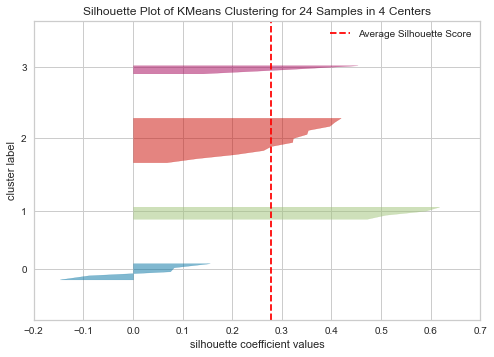

Silhouette score for 5  clusters:  0.29064690208493527


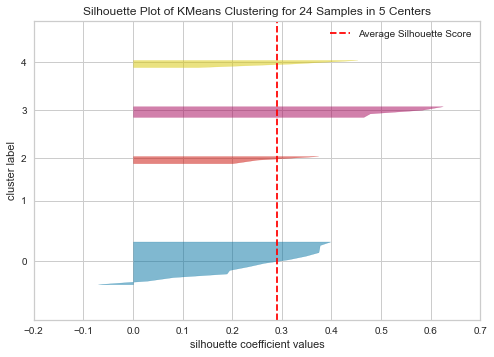

Silhouette score for 6  clusters:  0.2866583464200934


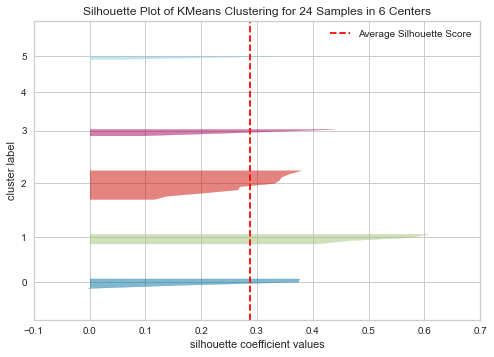

Silhouette score for 7  clusters:  0.2290828781548305


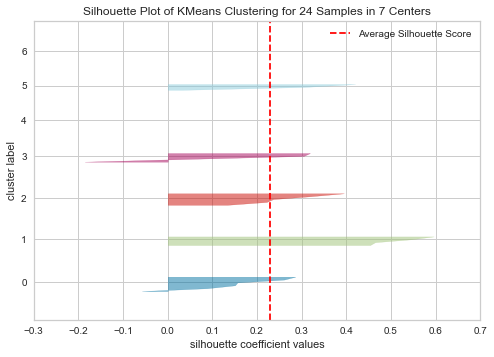

Silhouette score for 8  clusters:  0.22947142353052943


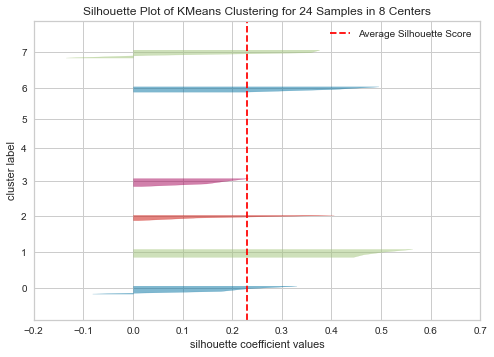

Silhouette score for 9  clusters:  0.236346811366427


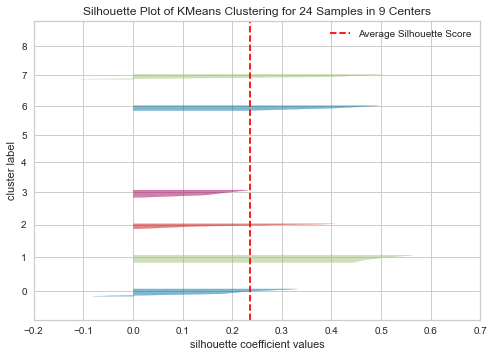

Silhouette score for 10  clusters:  0.24823512565133468


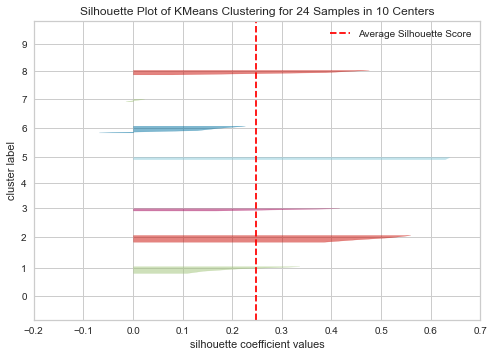

In [86]:
for n in range(4,11):
    model=KMeans(n_clusters=n, random_state=42, n_jobs=-1)
    model.fit(dfn)
    preds=model.predict(dfn)
    score=metrics.silhouette_score(dfn, preds)
    print('Silhouette score for', n, ' clusters: ', score)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer = visualizer.fit(dfn)
    visualizer.show();

#### Elbow Method

The Elbow Method runs k-means clustering across a range of k’s, and then calculates the average distance of each data point to the centroid (the mean of the object’s cluster). In other words, this calculation is Within-Cluster-Sum of Squared Error (WSS).

The concept behind the elbow method is that the variation between data points will change rapidly for smaller values of k (clusters), and then will then slow as k continues to grow. Visually this looks like an elbow when plotted. The stronger the explained variation between data points in a cluster, the stronger their association is. Knowing this, the most optimal value of k is at the elbow.  

Below we will run the elbow method across a range of 2-10 k values, to determine what the optimal number of clusters is.

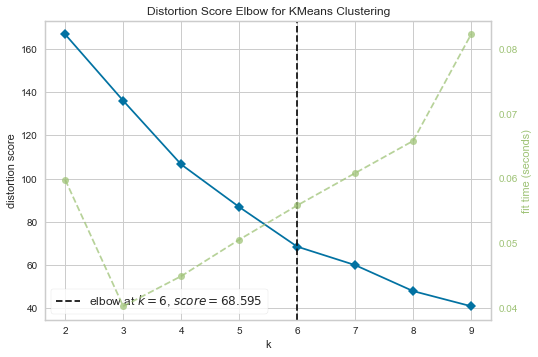

In [87]:
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(dfn)        
visualizer.show(); 

Given both the Silhouette score and Elbow plot show strongest scores around 6 clusters, I will move forward with 6 clusters for this model.

### Cluster and Centroid Visualizations

To visualize clusters, we will utilize PCA. PCA helps with visualization of data by reducing the dimensionality of the dataset.

Looking at the below scree plot, the rate of change starts to slow at PC2, PC3, and PC4. We can plot all to see where clustering is strongest.

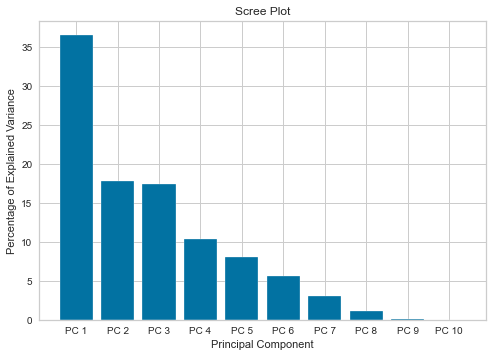

In [88]:
from sklearn.decomposition import PCA
pca = PCA()
data_reduced = pca.fit_transform(dfn) 

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels=['PC '+ str(x) for x in range(1,len(per_var)+1)]

plt.bar(range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [89]:
model = KMeans(n_clusters=6, random_state=42, n_jobs=-1)
model.fit(dfn)
preds= model.fit_predict(dfn)
preds

array([5, 0, 2, 2, 5, 1, 1, 4, 2, 1, 0, 2, 2, 0, 0, 2, 2, 3, 3, 3, 1, 2,
       2, 2])

Based on the below PCA plots, PCA3 has the most clear clustering.

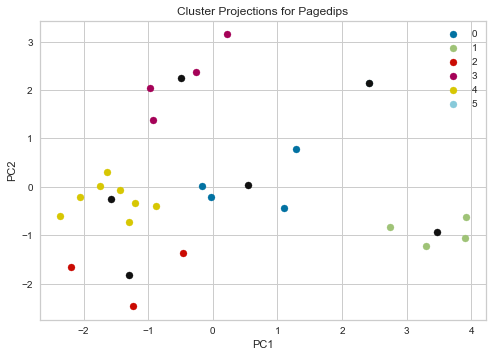

In [90]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2)
data_reduced = pca.fit_transform(dfn)

data_reduced = pca.fit_transform(dfn)
label = model.fit_predict(data_reduced)
centers = np.array(model.cluster_centers_)

cluster_pred = np.unique(label) 
for c in cluster_pred:
    plt.scatter(data_reduced[label == c , 0] , data_reduced[label == c , 1] , label = c)
plt.scatter(centers[:,0], centers[:,1], s=50, color='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cluster Projections for Pagedips')
plt.legend()
plt.show()

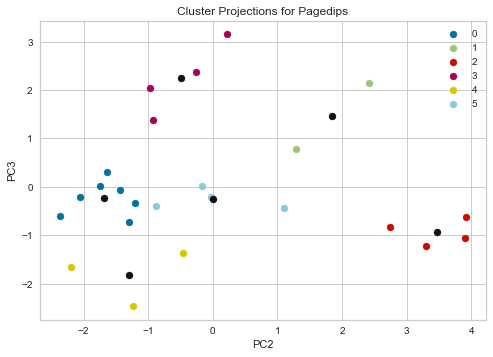

In [91]:
pca = PCA(n_components=3)
data_reduced = pca.fit_transform(dfn)

data_reduced = pca.fit_transform(dfn)
label = model.fit_predict(data_reduced)
centers = np.array(model.cluster_centers_)

cluster_pred = np.unique(label) 
for c in cluster_pred:
    plt.scatter(data_reduced[label == c , 0] , data_reduced[label == c , 1] , label = c)
plt.scatter(centers[:,0], centers[:,1], s=50, color='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('Cluster Projections for Pagedips')
plt.legend()
plt.show()

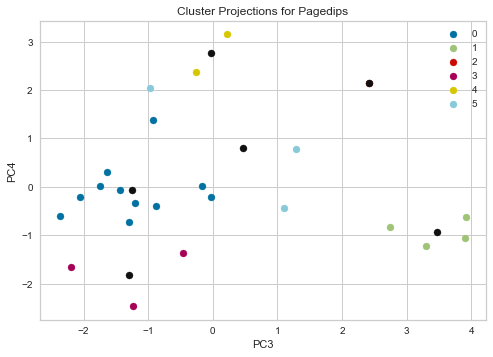

In [92]:
pca = PCA(n_components=4)
data_reduced = pca.fit_transform(dfn)

data_reduced = pca.fit_transform(dfn)
label = model.fit_predict(data_reduced)
centers = np.array(model.cluster_centers_)

cluster_pred = np.unique(label) 
for c in cluster_pred:
    plt.scatter(data_reduced[label == c , 0] , data_reduced[label == c , 1] , label = c)
plt.scatter(centers[:,0], centers[:,1], s=50, color='k')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title('Cluster Projections for Pagedips')
plt.legend()
plt.show()

If it was desirable to rank the clusters into an engagement index, we would need to somehow sort them from least to most engaging and then assign clusters based on that ranking. I show an example below ranking by Events per Session.

In [93]:
n_clusters = 5
km_stat = pd.DataFrame()
for i in range(n_clusters):
    km_stat[(i+1)] = dfn[model.labels_ == i].mean(axis=0)
      
km_stat = km_stat.T.reset_index()
km_stat = km_stat.sort_values(by='Events per Session').reset_index()
km_stat['Engagement Index'] = km_stat.index+1
km_stat.rename(columns={"index":"Cluster"}, inplace=True)
km_stat = km_stat.drop(['level_0'],axis=1)
km_stat['Cluster'] = km_stat['Cluster'].astype(int)
km_stat

,Cluster,Events per Session,Expandable Lists per Session,Vidyards per Session,Overlays per Session,Binks per Session,Tab-its per Session,Time on page per Session,Expandable List Time per Session,Bink Time per Session,Tab-it Time per Session,Engagement Index
0,4,-0.804902,-1.072311,-0.437036,-0.683760,0.863742,-0.563061,-0.652505,0.032578,2.150269,-0.860710,1
1,1,-0.626203,0.068921,-0.443679,-0.540693,-0.680634,-0.316896,-0.410194,0.494636,-0.501543,-0.390551,2
2,5,0.714362,-0.144166,-0.458041,-0.194387,-0.865596,2.237581,-0.643075,-0.045977,-0.537564,1.535949,3
3,2,1.713720,0.470354,2.234955,2.024824,0.605106,-0.463697,0.438663,-0.964232,-0.136417,-0.174205,4
4,3,1.856922,1.105955,-0.458041,0.574010,2.217451,3.150588,0.243325,-0.438546,0.837569,0.782032,5


The pagedip IDs that fall into Cluster 4 are the least engaging content, while pagedips in Cluster 3 are the most engaging.

Lastly, we will merge this new engagement index back with pagedip IDs and plot final results.

In [94]:
k_dict = {
    'Pagedip ID': df['Pagedip ID'],
    'Cluster': preds+1}


    
km_r = pd.DataFrame(k_dict).sort_values(by=['Cluster'])
km_r

,Pagedip ID,Cluster
1,3c252600-8307-11ec-bb94-6d0f7bef74f7,1
14,f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,1
10,b8089cc0-d62c-11ec-aba5-b919df6bf647,1
13,e8595b10-852f-11ec-b53d-252a12b41b79,1
25,4a9e8fa0-7b23-11ec-a218-7de02e5eae30,2
5,58218de0-7aeb-11ec-80ef-99f8cf724b30,2
6,6410efd0-7adf-11ec-a56d-ab8ec6f438d2,2
9,aa6d5960-798f-11ec-a0b6-95a7ff960d33,2
11,e6459470-8088-11ec-b53d-252a12b41b79,3
26,5b372390-d546-11ec-a4cc-855155946238,3


In [95]:
mif = pd.merge(right=df, left=km_r, on='Pagedip ID')
mif.groupby('Cluster').mean().sort_values('Cluster').reset_index()

,Cluster,Events per Session,Expandable Lists per Session,Vidyards per Session,Overlays per Session,Binks per Session,Tab-its per Session,Time on page per Session,Expandable List Time per Session,Bink Time per Session,Tab-it Time per Session
0,1,2.275996,0.515846,0.000000,1.013657,0.000000,0.746493,681.411668,0.102661,0.000000,0.088100
1,2,3.612708,0.564434,0.909275,1.982067,0.091589,0.065343,1302.539074,0.032490,0.041102,0.024107
2,3,1.560260,0.526913,0.005334,0.919261,0.012671,0.096081,502.945460,0.103547,0.004060,0.011753
3,4,1.444269,0.439279,0.007092,0.865511,0.107696,0.024691,255.048394,0.083003,0.275400,0.000000
4,5,3.736000,0.616000,0.000000,1.384000,0.192000,1.544000,1115.020544,0.059129,0.140898,0.057687
5,6,2.034005,0.553251,0.000000,1.190494,0.142794,0.147465,3154.508911,0.034115,0.074904,0.050672


In [96]:
mif.groupby(['Pagedip ID','Cluster']).mean().round(0).sort_values(['Cluster', 'Events per Session'])

,,Events per Session,Expandable Lists per Session,Vidyards per Session,Overlays per Session,Binks per Session,Tab-its per Session,Time on page per Session,Expandable List Time per Session,Bink Time per Session,Tab-it Time per Session
Pagedip ID,Cluster,,,,,,,,,,
e8595b10-852f-11ec-b53d-252a12b41b79,1,2.0,0.0,0.0,1.0,0.0,0.0,1863.0,0.0,0.0,0.0
f04f8b60-d62d-11ec-a423-ddb76bf7a5d0,1,2.0,1.0,0.0,1.0,0.0,0.0,335.0,0.0,0.0,0.0
3c252600-8307-11ec-bb94-6d0f7bef74f7,1,3.0,1.0,0.0,1.0,0.0,1.0,391.0,0.0,0.0,0.0
b8089cc0-d62c-11ec-aba5-b919df6bf647,1,3.0,1.0,0.0,1.0,0.0,1.0,137.0,0.0,0.0,0.0
58218de0-7aeb-11ec-80ef-99f8cf724b30,2,3.0,0.0,1.0,2.0,0.0,0.0,572.0,0.0,0.0,0.0
4a9e8fa0-7b23-11ec-a218-7de02e5eae30,2,4.0,1.0,1.0,2.0,0.0,0.0,1288.0,0.0,0.0,0.0
6410efd0-7adf-11ec-a56d-ab8ec6f438d2,2,4.0,1.0,1.0,2.0,0.0,0.0,2768.0,0.0,0.0,0.0
aa6d5960-798f-11ec-a0b6-95a7ff960d33,2,4.0,1.0,1.0,2.0,0.0,0.0,582.0,0.0,0.0,0.0
5b8ce410-89ec-11ec-bb94-6d0f7bef74f7,3,1.0,0.0,0.0,1.0,0.0,0.0,66.0,0.0,0.0,0.0


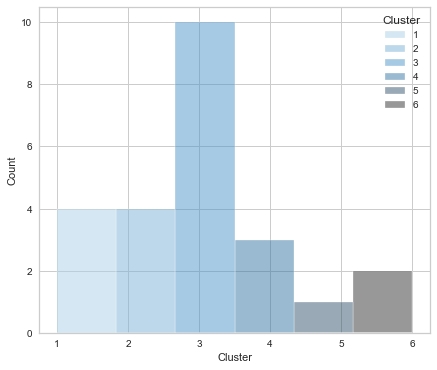

In [97]:
plt.rcParams['figure.figsize'] = (7, 6)
min_val = mif['Cluster'].min()
max_val = mif['Cluster'].max()
val_width = max_val - min_val
n_bins = mif['Cluster'].nunique()
bin_width = val_width/n_bins

sns.histplot(mif, x="Cluster", hue="Cluster", bins=n_bins, binrange=(min_val, max_val), palette='Blues_d')
plt.xticks([1,2,3,4,5,6]);
           

### References

Ataee, P. (2020). Silhouette or Elbow? That is the Question. Towards Data Science. https://towardsdatascience.com/silhouette-or-elbow-that-is-the-question-a1dda4fb974

Exporting looped plots into pdf in Python (2020). Stack Overflow. https://stackoverflow.com/questions/62315217/exporting-looped-plots-into-pdf-in-python

Garbade, M. J. (2018). Understanding K-means Clustering in Machine Learning. Towards Data Science. https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

Starmer, S. with J. (2022). StatQuest/pca_demo [R]. https://github.com/StatQuest/pca_demo/blob/e909923880018cb7c226267698708cd277a701b0/pca_demo.py 